In [1]:
import argparse
import random

import numpy as np
import torch

from src import config
from src.NICE_SLAM import NICE_SLAM
from src.Segmenter import Segmenter

import os #J:added
from torch.utils.tensorboard import SummaryWriter #J: added
import yaml #J: added

def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True




cfg = config.load_config( #J:changed it to use our config file including semantics
    '/home/koerner/Project/nice-slam/configs/Own/room0.yaml','configs/nice_slam_sem.yaml')

#----------------------------added for tensorboard writer---------------------------
num_of_runs = len(os.listdir(cfg["data"]['logs'])) if os.path.exists(cfg["data"]['logs']) else 0
path = os.path.join(cfg["data"]['logs'], f'run_{num_of_runs + 1}')
cfg["data"]['logs'] = path
os.makedirs(path, exist_ok=True)

writer = SummaryWriter(path)
hparams_path = cfg['inherit_from']
with open(hparams_path, 'r') as file:
    hparams_dict = yaml.safe_load(file)
yaml_string = yaml.dump(hparams_dict, default_flow_style=False)
writer.add_text('hparams', yaml_string)
writer.close()
print('read in hparams')
#-----------------------------------------------------------------------------------

segmenter = Segmenter(cfg, None, store_directory=os.path.join(cfg['data']['input_folder'], 'segmentation'))


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
read in hparams


segment first frame


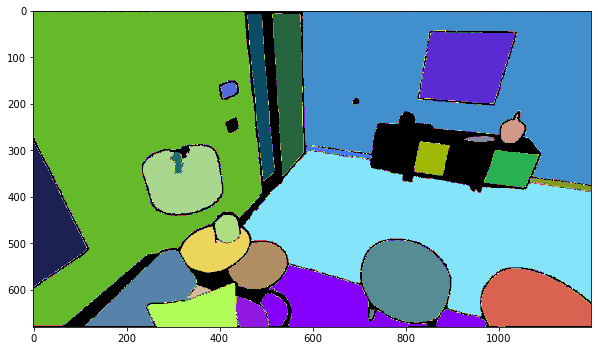

Segmenting frames:   0%|          | 0/39 [00:00<?, ?it/s]

e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:   3%|▎         | 1/39 [00:04<02:36,  4.12s/it]

e  [False False False False]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:   5%|▌         | 2/39 [00:08<02:37,  4.26s/it]

e  [ True  True False False]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True False False  True]
e  [ True  True  True  True]


Segmenting frames:   8%|▊         | 3/39 [00:12<02:30,  4.19s/it]

e  [ True  True False False]
e  [ True  True False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]


Segmenting frames:  10%|█         | 4/39 [00:16<02:25,  4.16s/it]

e  [ True  True False False]
e  [False  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]


Segmenting frames:  13%|█▎        | 5/39 [00:20<02:20,  4.13s/it]

e  [ True  True False False]
e  [False  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [False False False False]
e  [ True  True  True  True]


Segmenting frames:  15%|█▌        | 6/39 [00:25<02:18,  4.21s/it]

e  [False False False False]
e  [False False False False]
e  [False False  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True False]
e  [ True  True  True  True]


Segmenting frames:  18%|█▊        | 7/39 [00:29<02:18,  4.31s/it]

e  [False False False False]
e  [ True  True False False]
e  [False False False  True]
e  [ True  True False False]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True False False]
e  [ True  True  True  True]


Segmenting frames:  21%|██        | 8/39 [00:34<02:15,  4.37s/it]

e  [False False False False]
e  [ True False  True False]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True False False]
e  [False  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]


Segmenting frames:  23%|██▎       | 9/39 [00:38<02:12,  4.43s/it]

e  [False  True  True False]
e  [ True  True False  True]
e  [False False False False]
e  [ True False  True False]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]


Segmenting frames:  26%|██▌       | 10/39 [00:43<02:09,  4.47s/it]

e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True False  True False]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  28%|██▊       | 11/39 [00:47<02:02,  4.38s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True False]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  31%|███       | 12/39 [00:51<01:56,  4.30s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  33%|███▎      | 13/39 [00:55<01:49,  4.20s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  36%|███▌      | 14/39 [00:59<01:43,  4.13s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True False  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  38%|███▊      | 15/39 [01:03<01:37,  4.06s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  41%|████      | 16/39 [01:06<01:29,  3.91s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [False  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  44%|████▎     | 17/39 [01:10<01:22,  3.74s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  46%|████▌     | 18/39 [01:13<01:16,  3.66s/it]

e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  49%|████▊     | 19/39 [01:17<01:13,  3.66s/it]

e  [False False False False]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  51%|█████▏    | 20/39 [01:20<01:08,  3.63s/it]

e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  54%|█████▍    | 21/39 [01:25<01:07,  3.77s/it]

e  [False False False False]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  56%|█████▋    | 22/39 [01:29<01:06,  3.90s/it]

e  [ True  True  True False]
e  [False  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  59%|█████▉    | 23/39 [01:33<01:03,  3.99s/it]

e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  62%|██████▏   | 24/39 [01:38<01:02,  4.18s/it]

e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  64%|██████▍   | 25/39 [01:42<01:00,  4.30s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]


Segmenting frames:  67%|██████▋   | 26/39 [01:47<00:57,  4.44s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]


Segmenting frames:  69%|██████▉   | 27/39 [01:52<00:54,  4.51s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]


Segmenting frames:  72%|███████▏  | 28/39 [01:56<00:49,  4.53s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  74%|███████▍  | 29/39 [02:01<00:45,  4.57s/it]

e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  77%|███████▋  | 30/39 [02:05<00:41,  4.56s/it]

e  [False  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True  True  True]
e  [ True  True  True  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  79%|███████▉  | 31/39 [02:10<00:35,  4.47s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True False  True]
e  [ True False  True  True]
e  [False  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  82%|████████▏ | 32/39 [02:14<00:30,  4.41s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False False False]
e  [ True  True  True False]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True False  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  85%|████████▍ | 33/39 [02:18<00:25,  4.31s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True False  True]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  87%|████████▋ | 34/39 [02:22<00:20,  4.17s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  90%|████████▉ | 35/39 [02:26<00:16,  4.04s/it]

e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  92%|█████████▏| 36/39 [02:29<00:11,  3.99s/it]

e  [False False False False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True False  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  95%|█████████▍| 37/39 [02:33<00:07,  3.99s/it]

e  [False False False False]
e  [ True False False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]


Segmenting frames:  97%|█████████▋| 38/39 [02:38<00:04,  4.06s/it]

e  [False False False False]
e  [False  True False  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [False  True False  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True  True]
e  [ True  True  True False]
e  [ True  True  True  True]
e  [False False False False]
e  [ True  True  True  True]


Segmenting frames: 100%|██████████| 39/39 [02:42<00:00,  4.16s/it]


<Figure size 432x288 with 0 Axes>

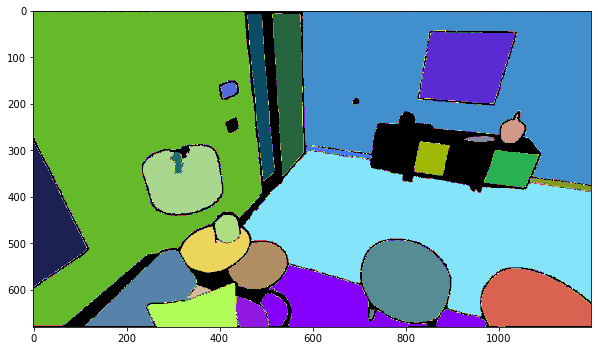

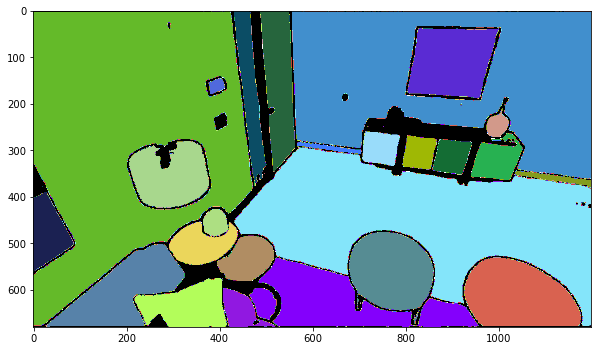

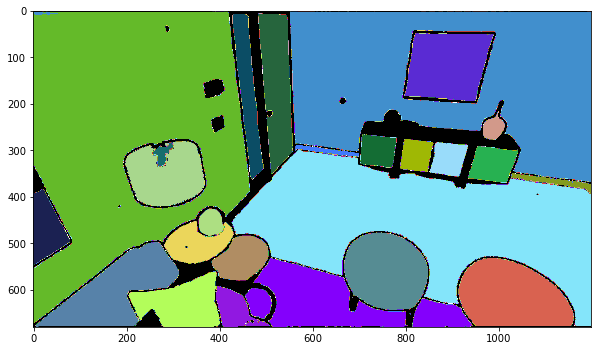

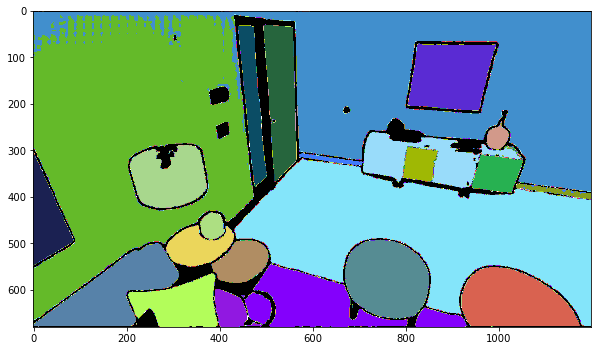

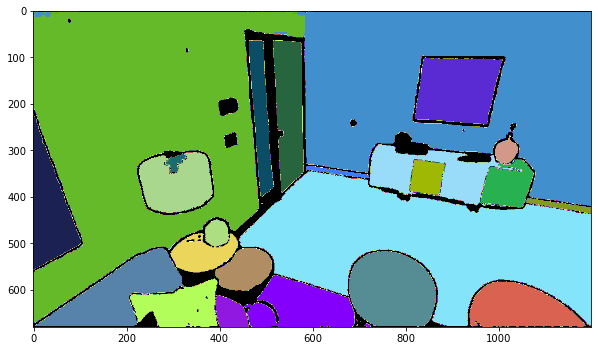

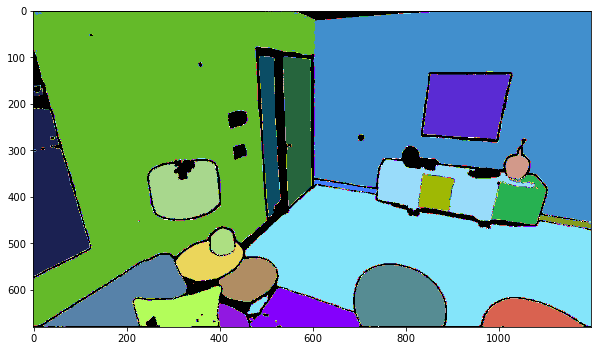

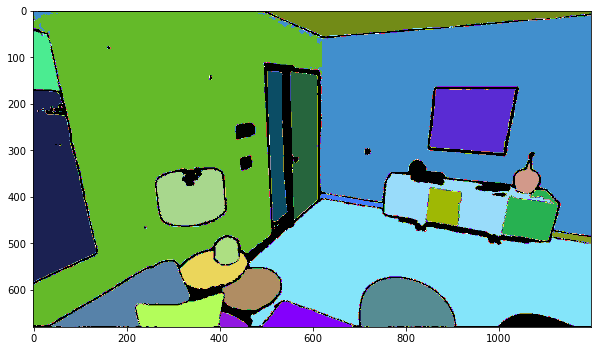

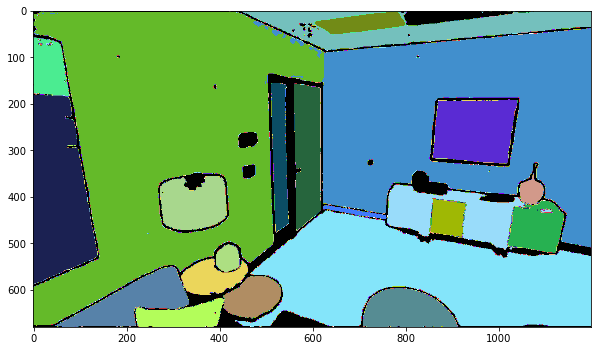

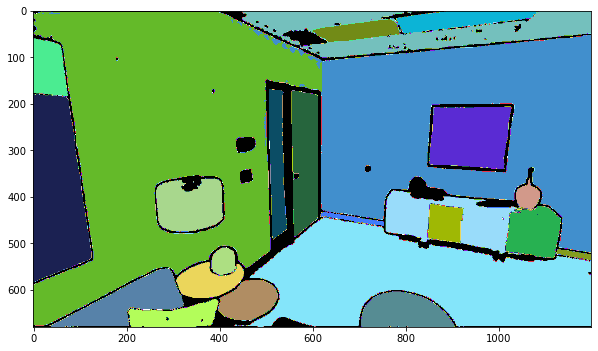

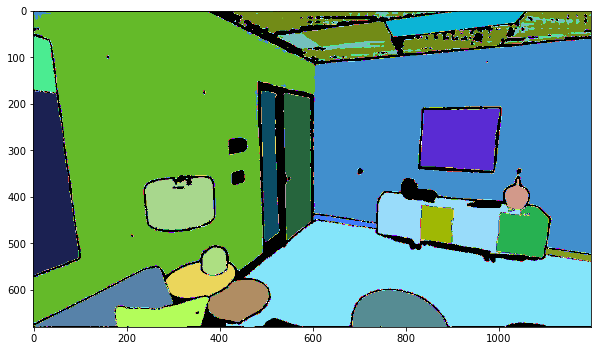

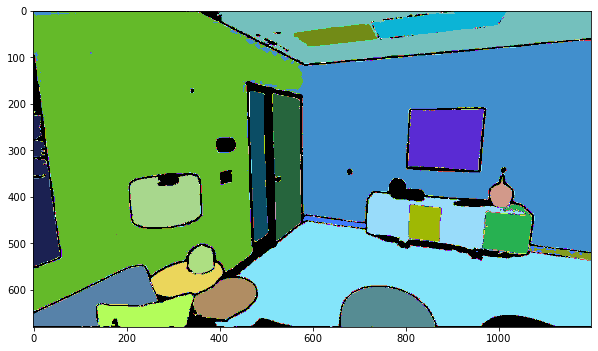

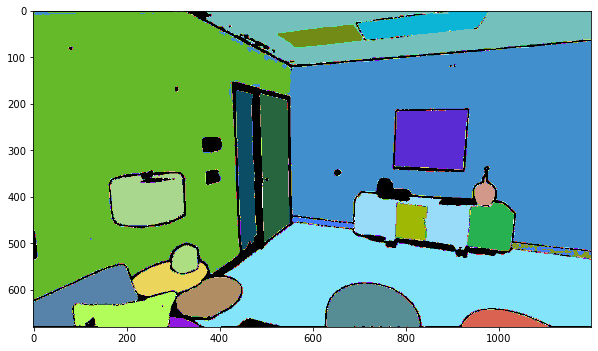

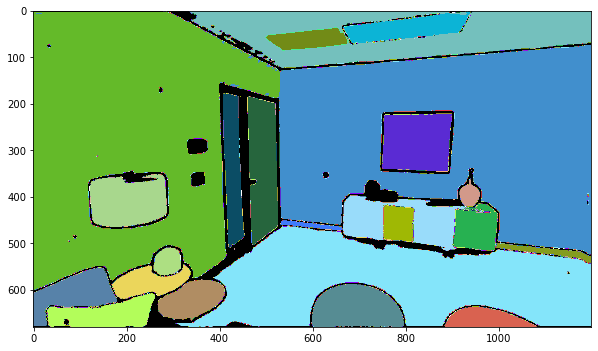

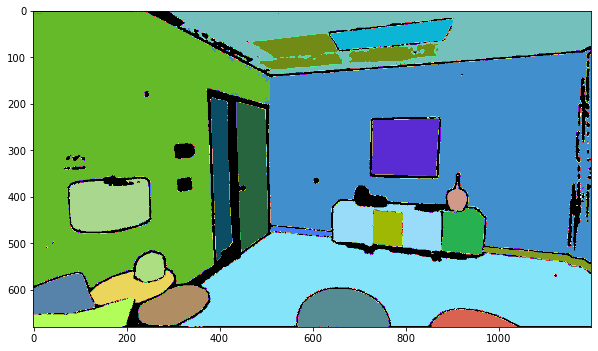

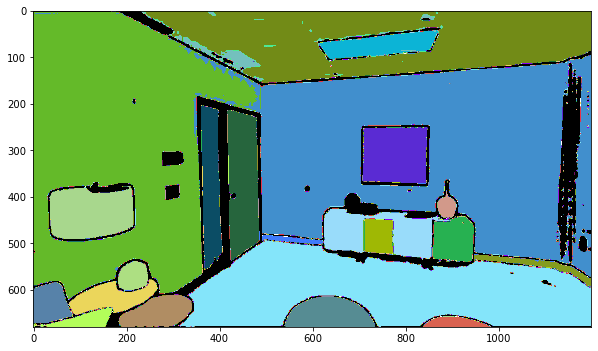

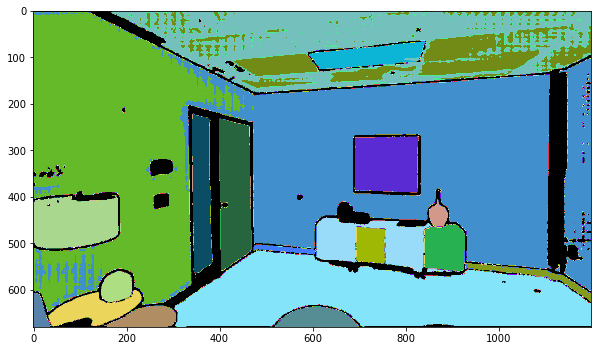

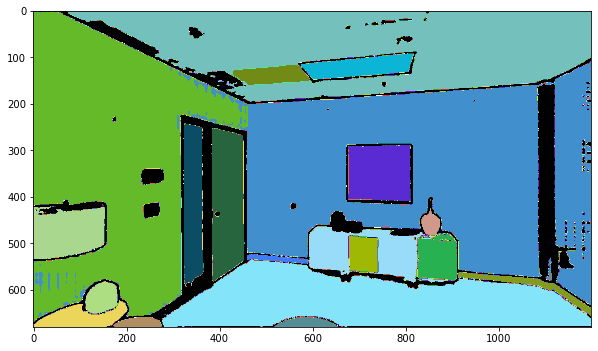

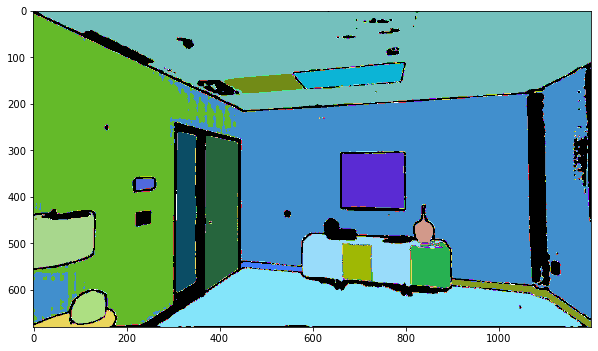

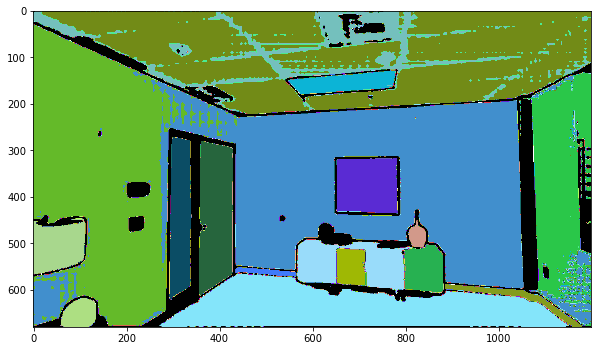

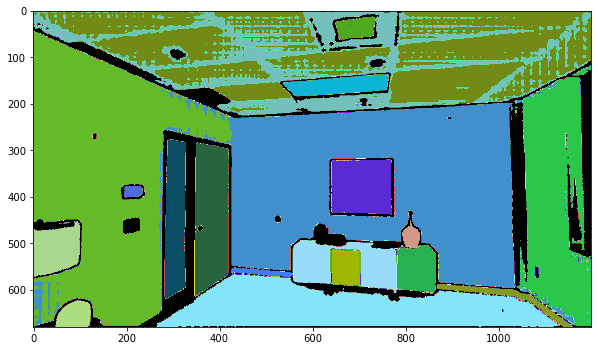

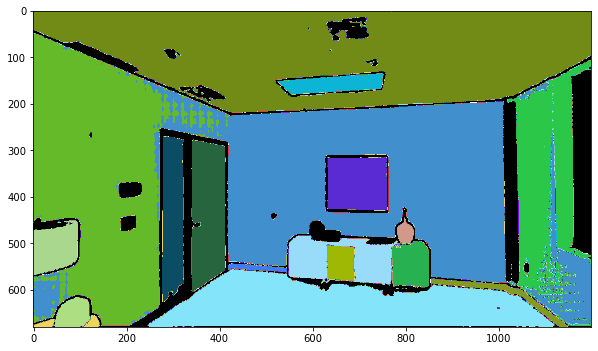

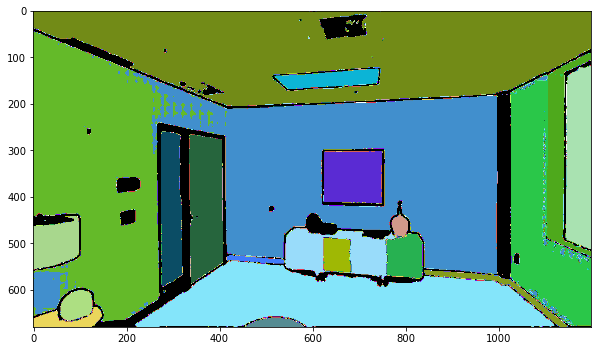

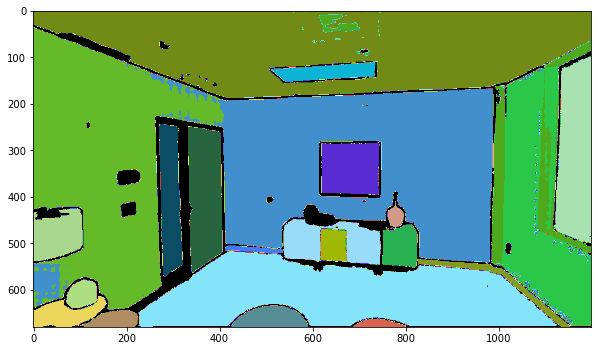

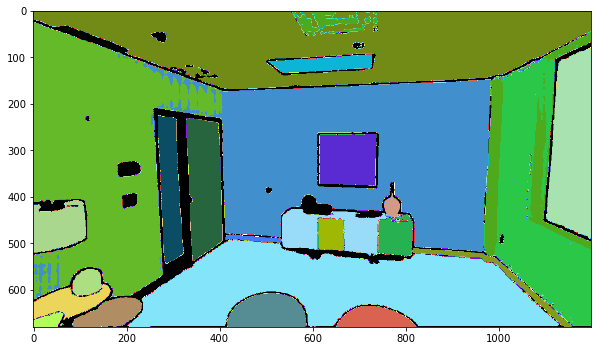

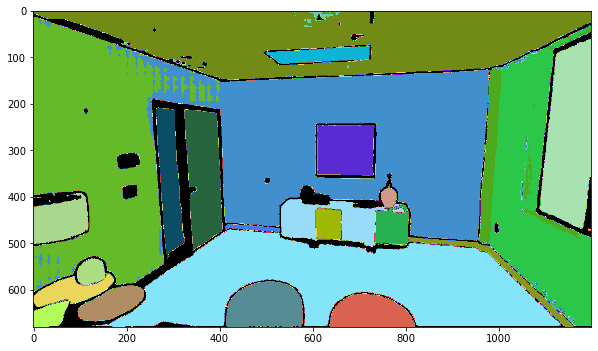

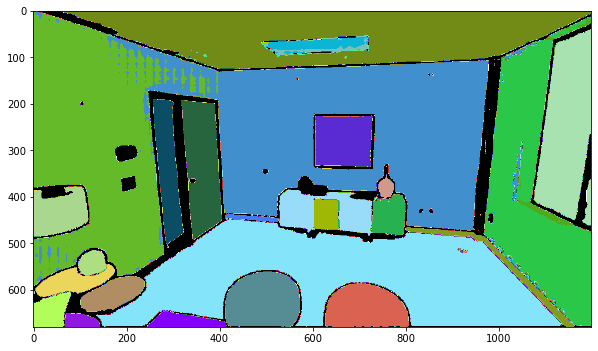

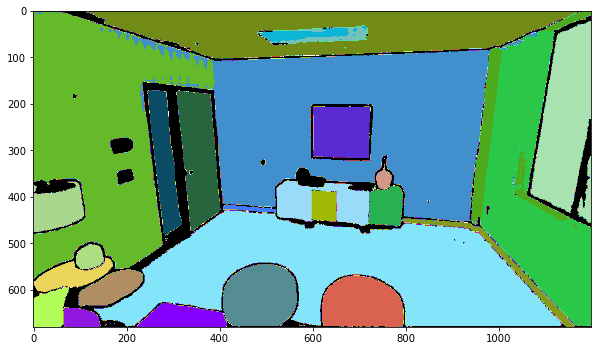

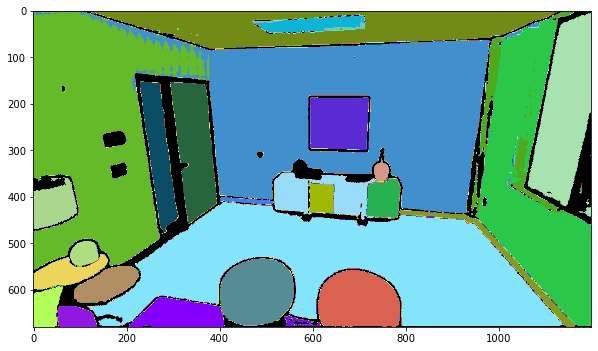

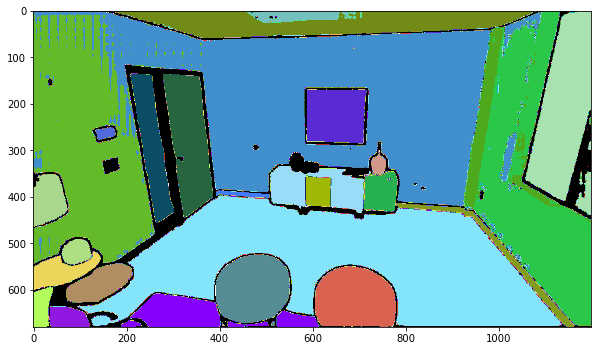

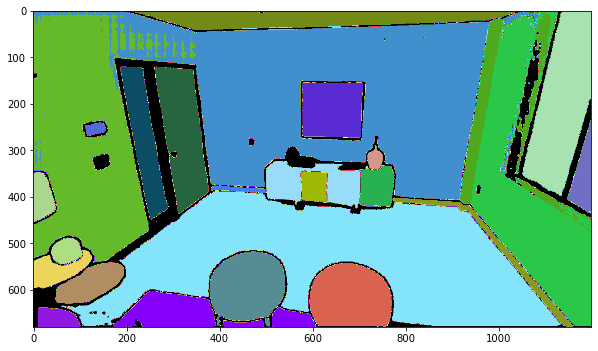

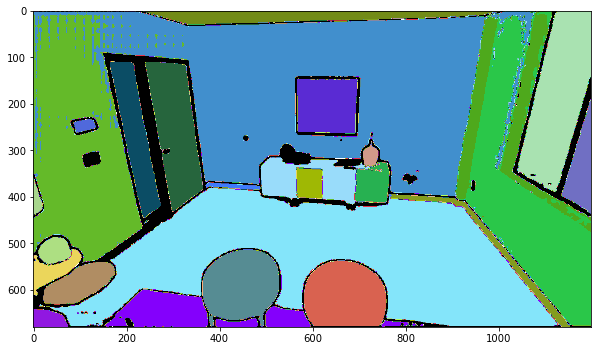

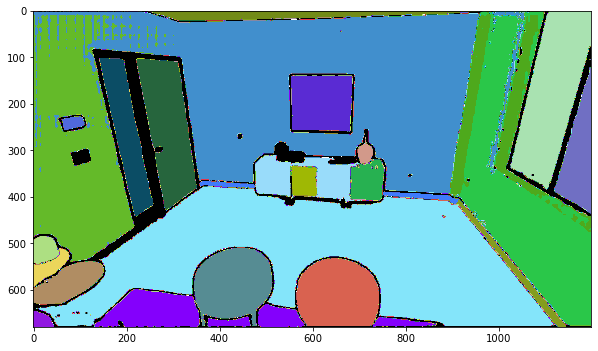

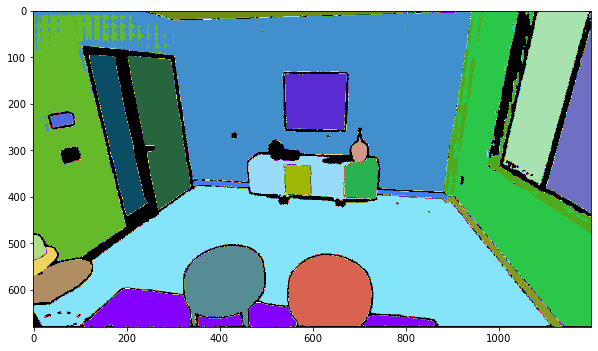

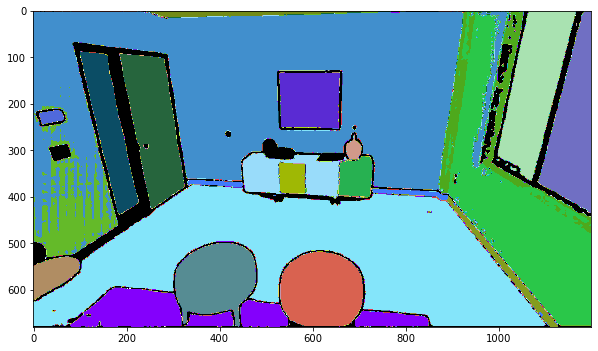

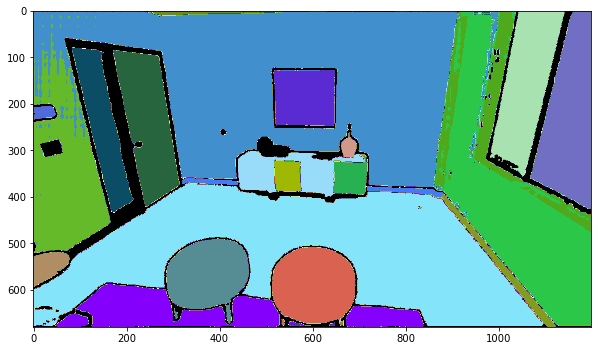

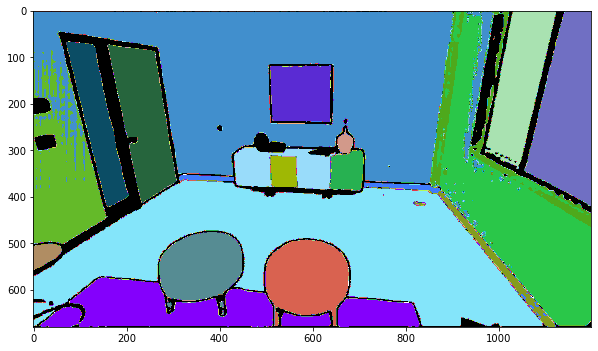

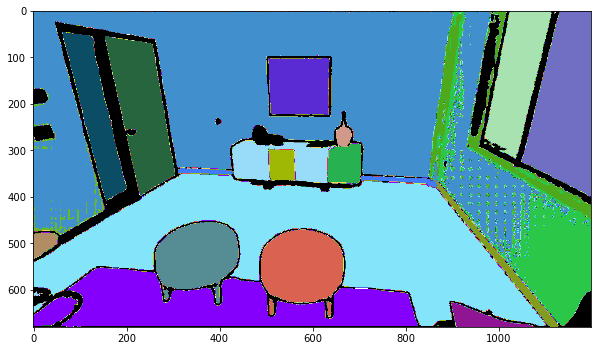

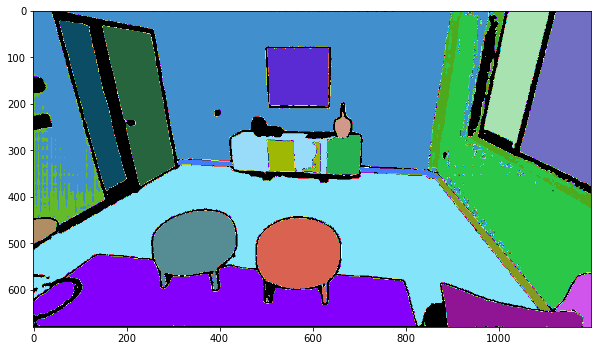

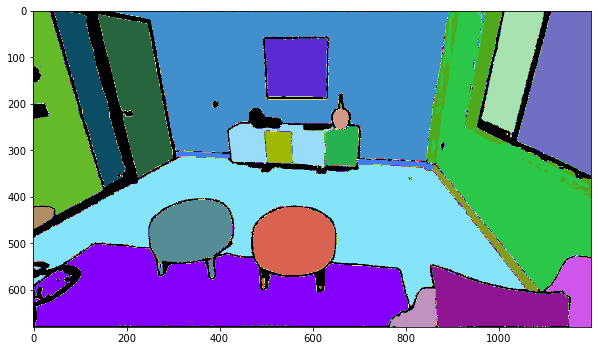

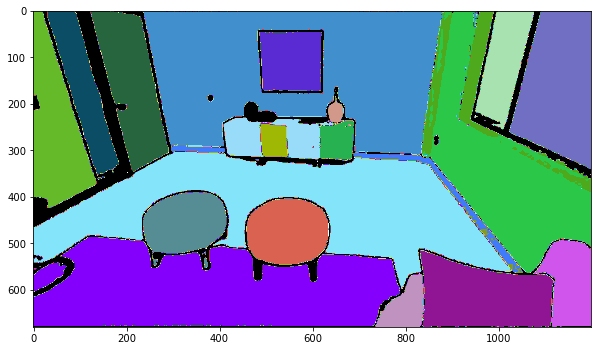

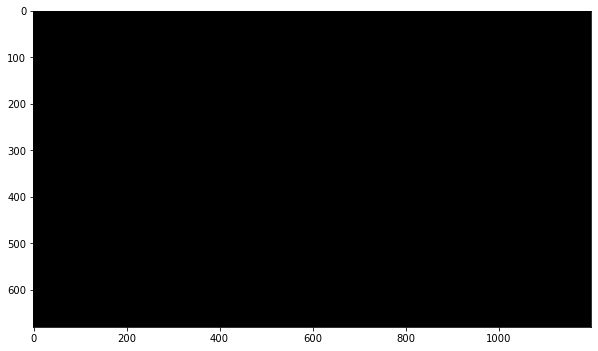

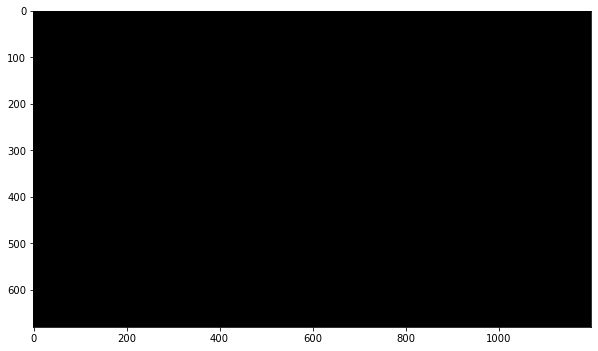

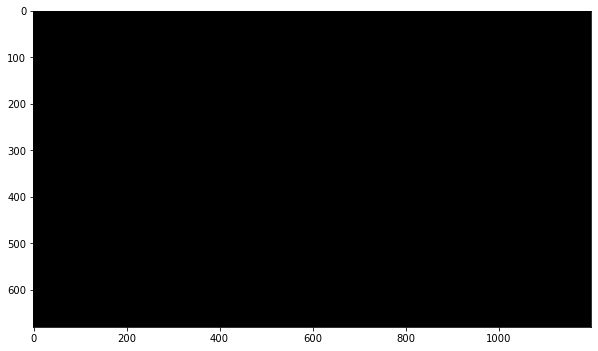

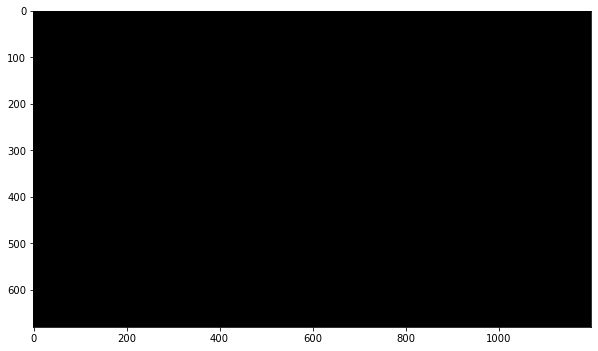

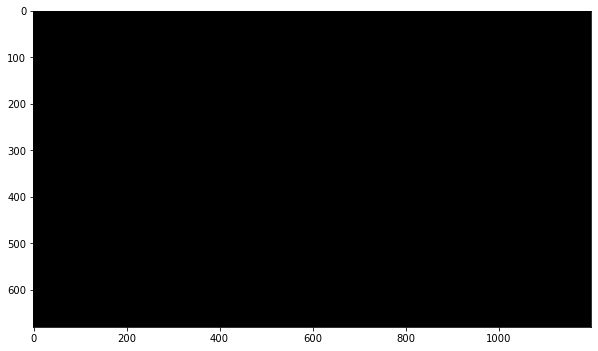

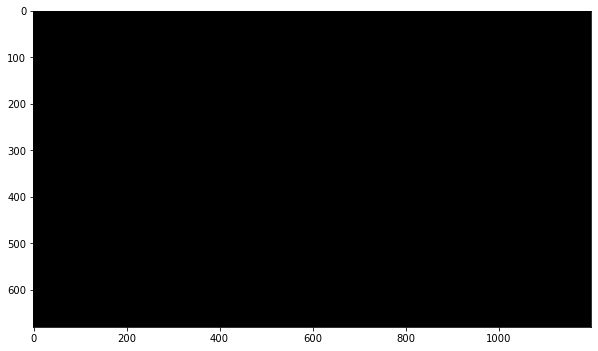

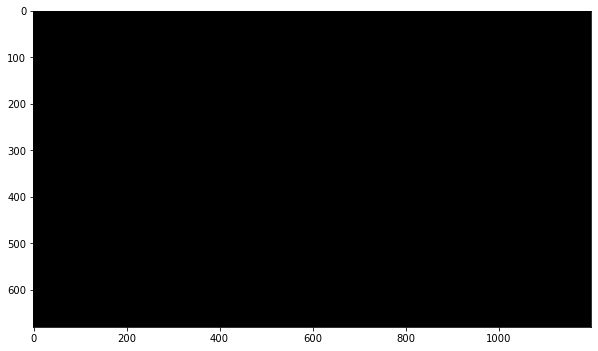

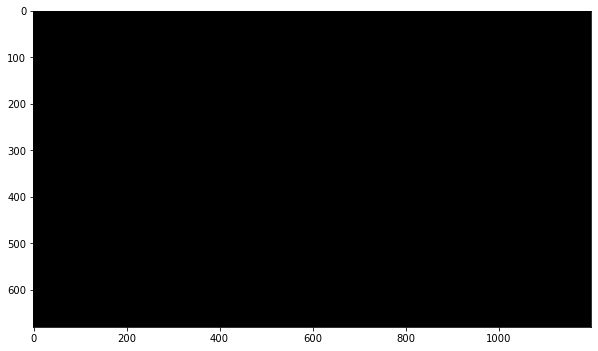

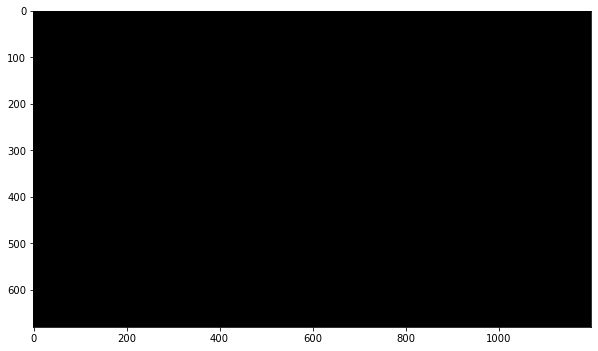

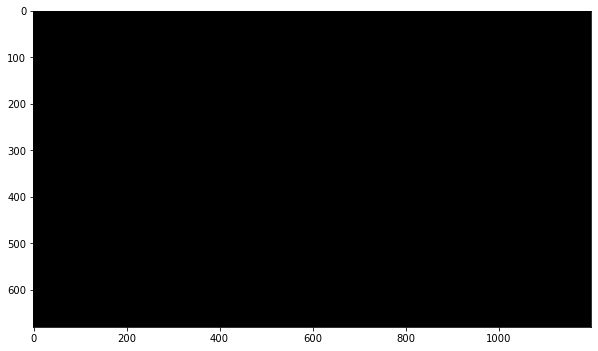

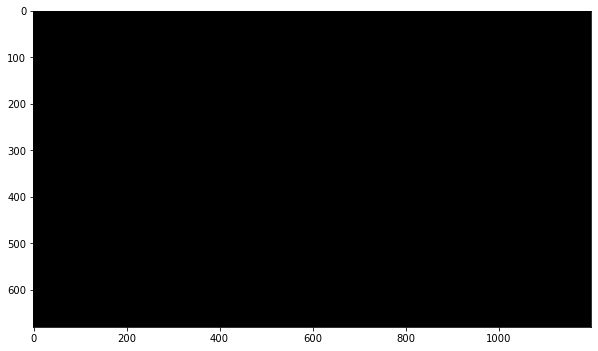

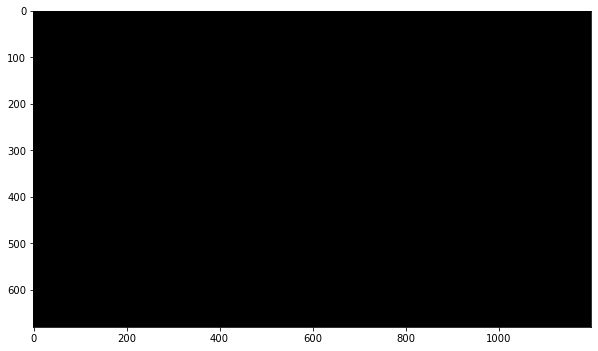

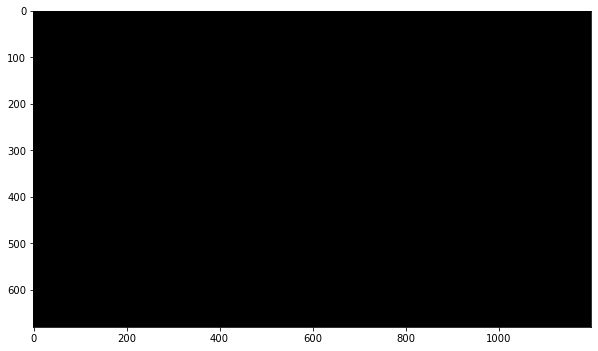

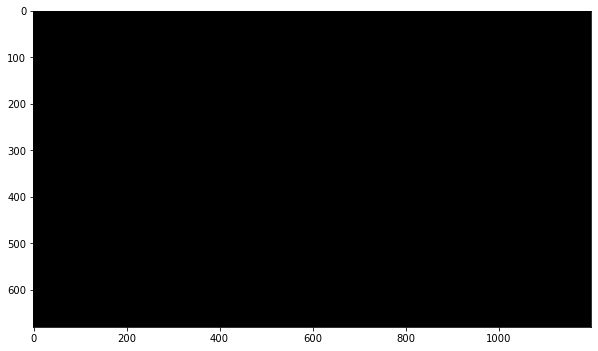

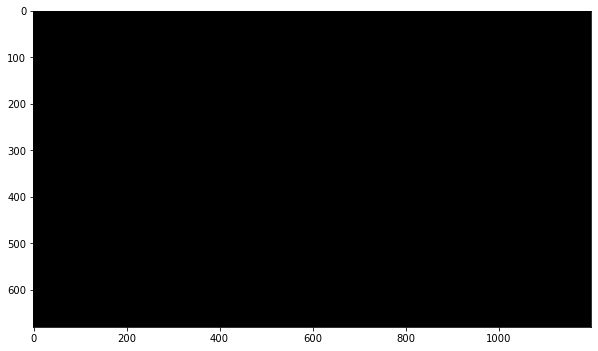

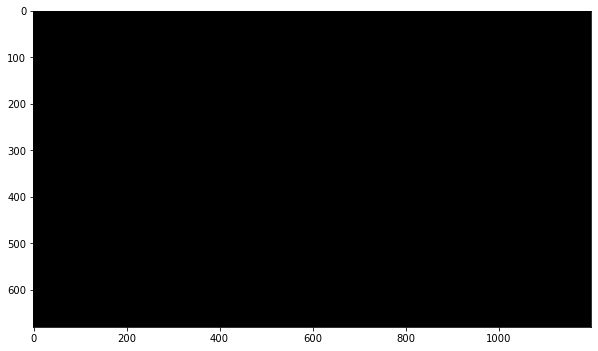

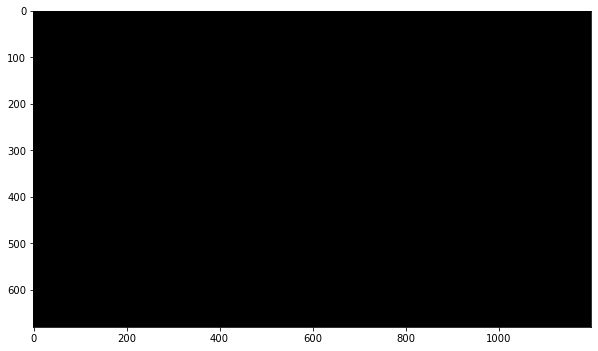

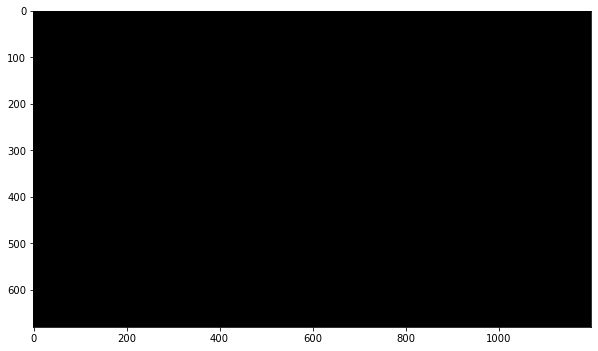

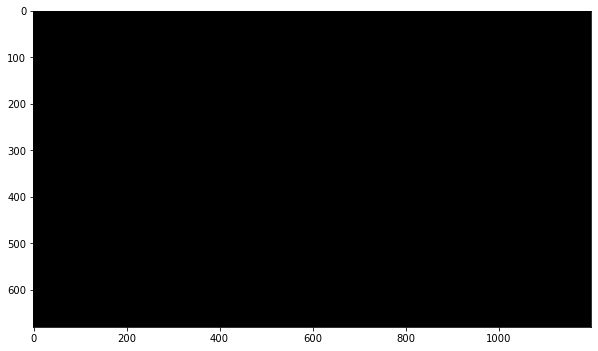

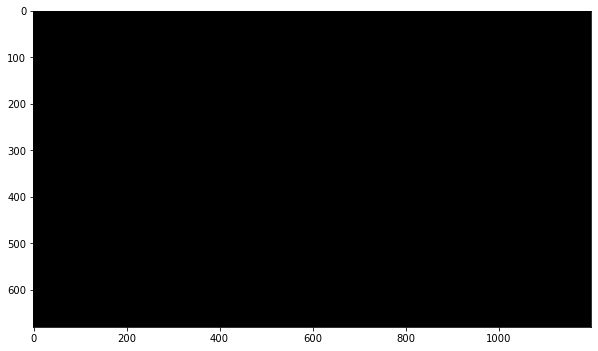

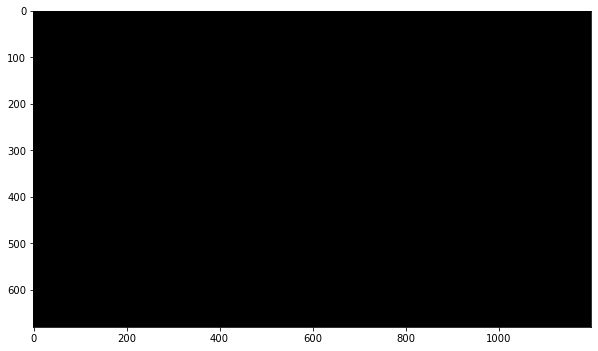

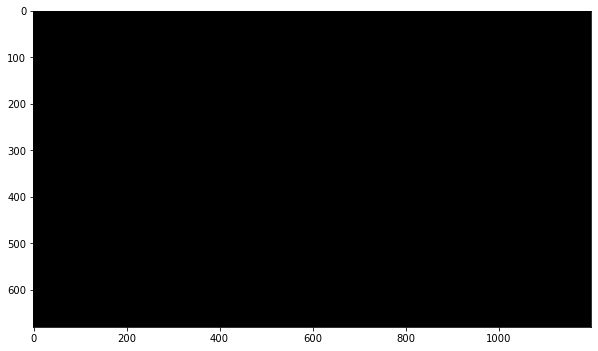

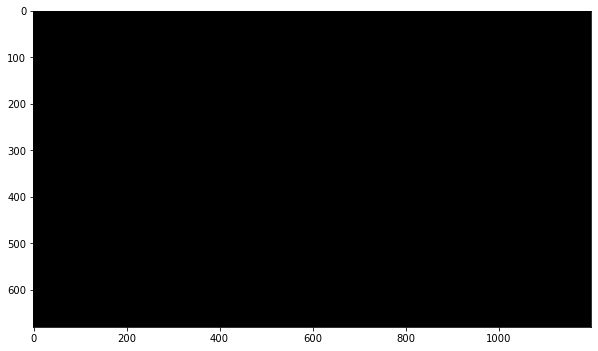

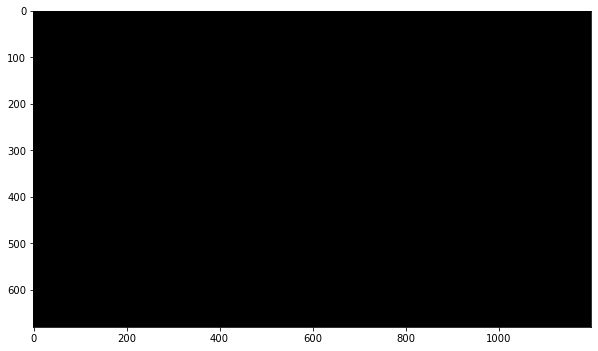

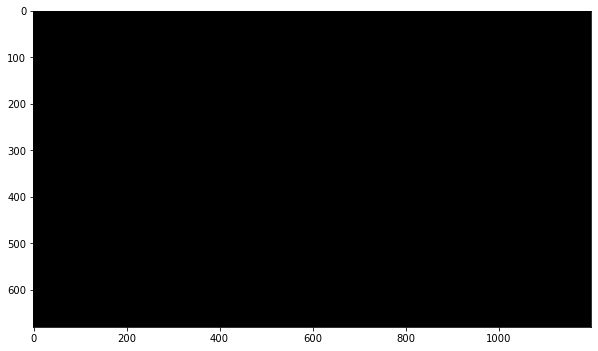

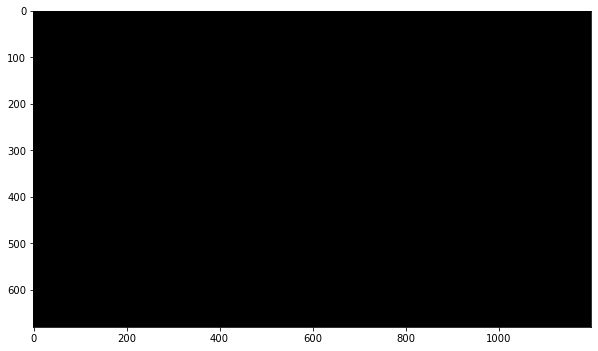

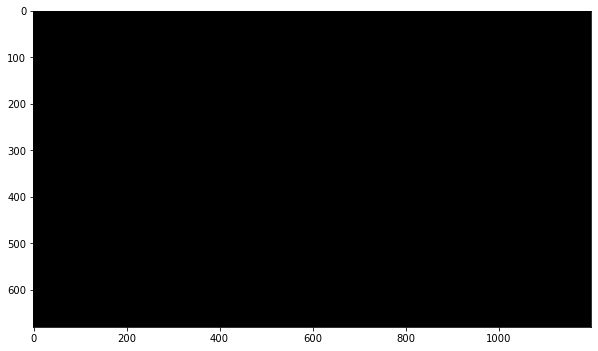

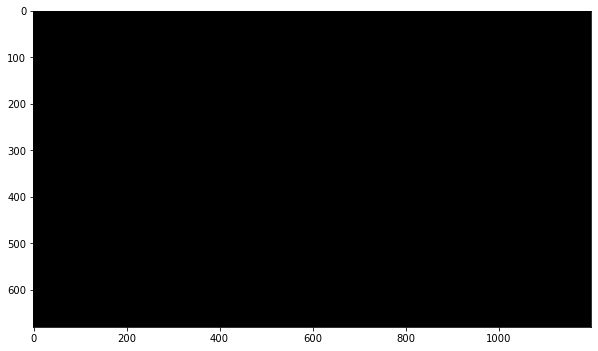

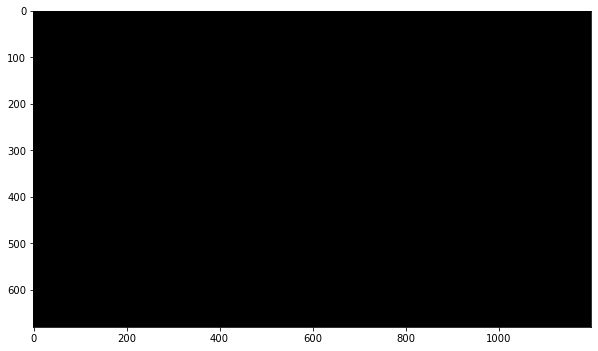

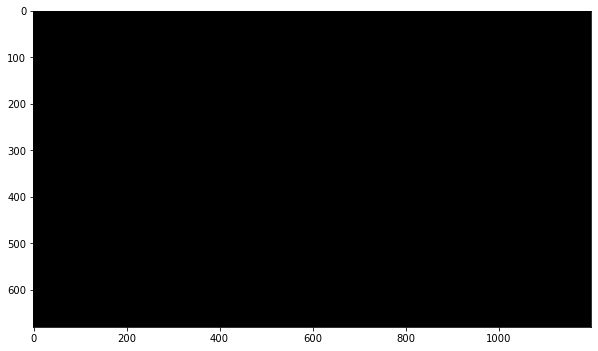

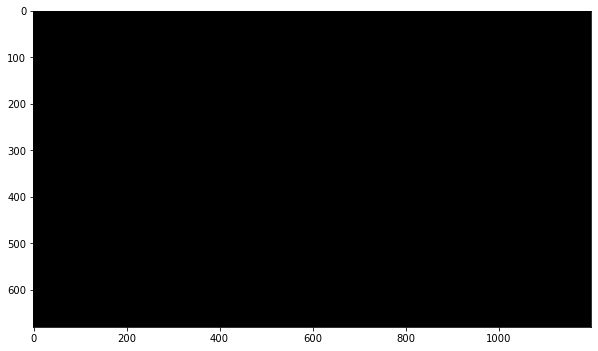

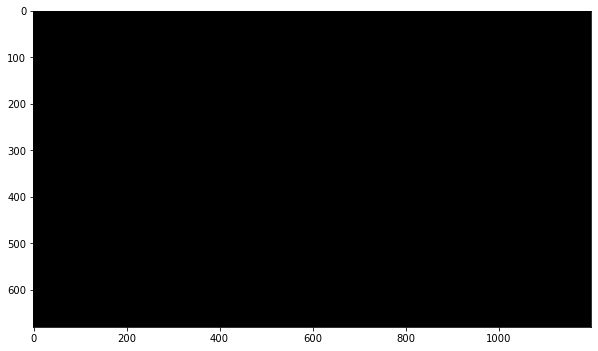

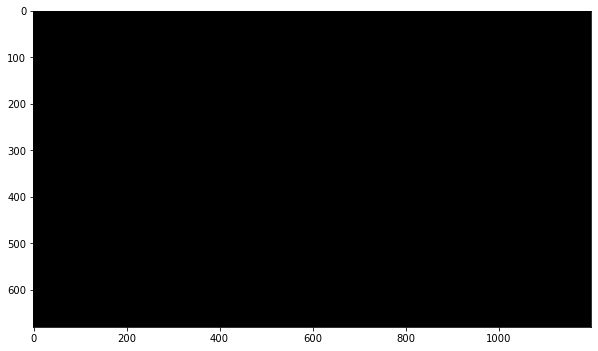

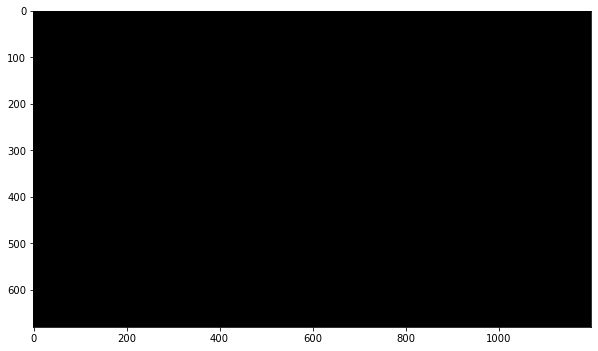

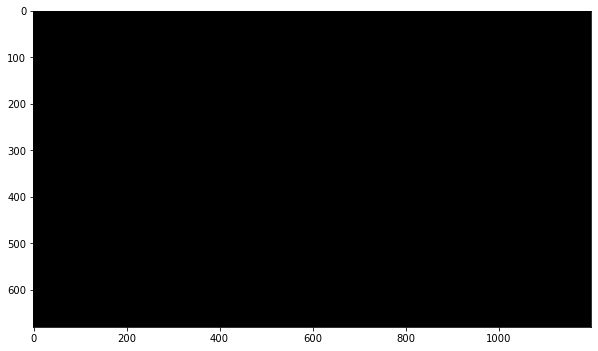

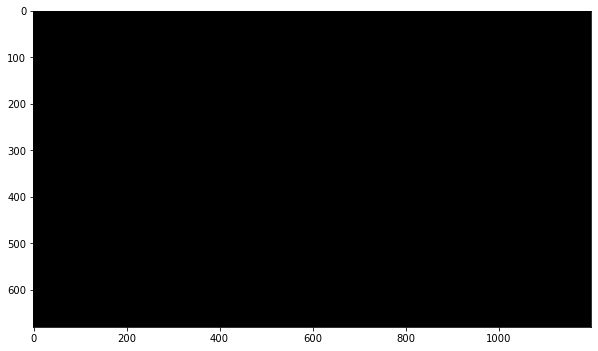

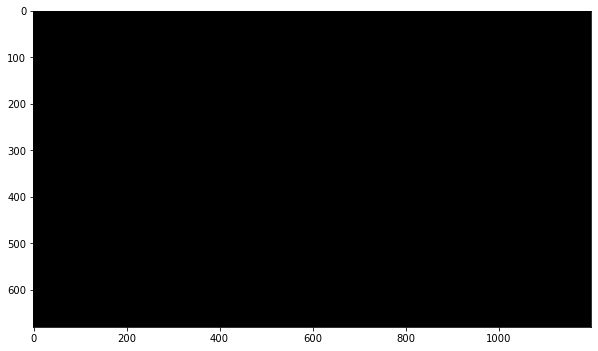

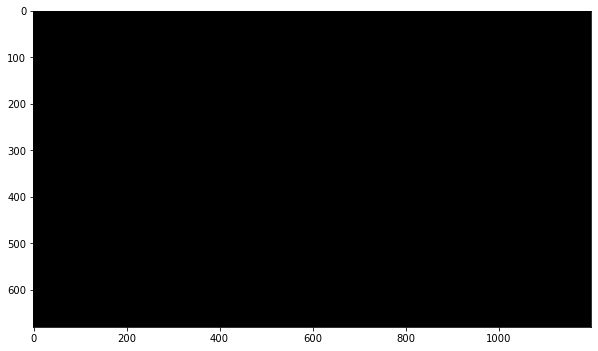

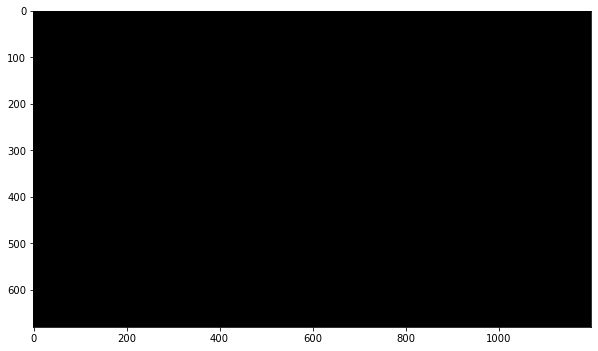

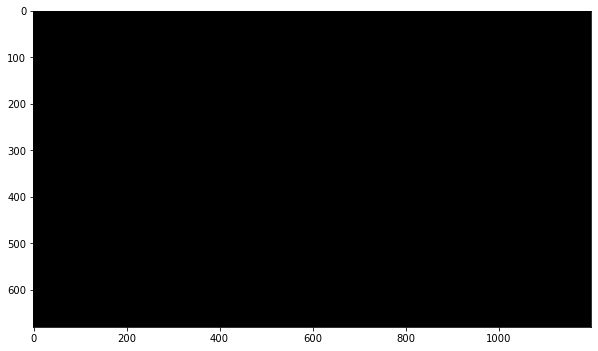

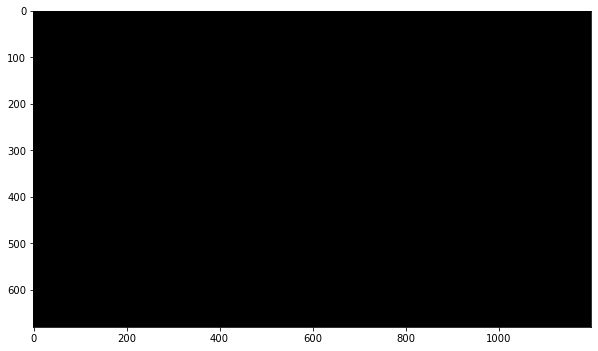

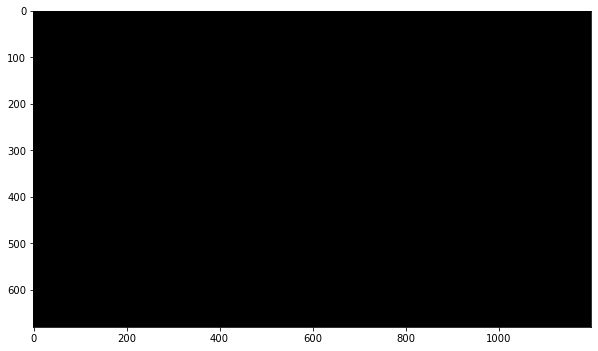

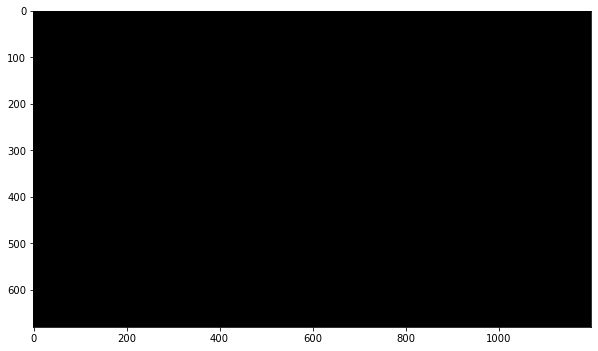

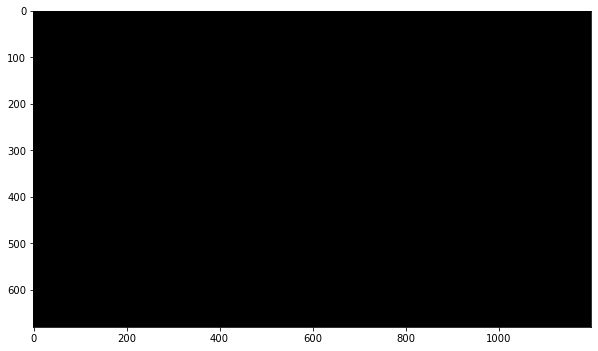

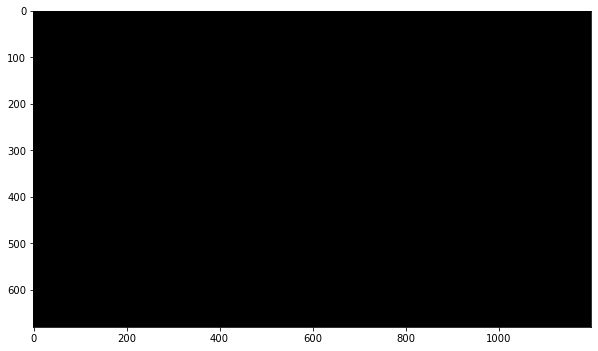

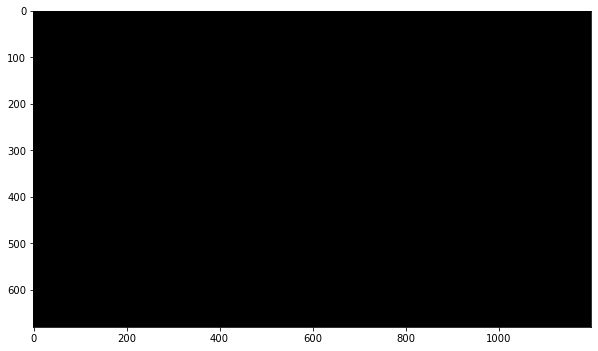

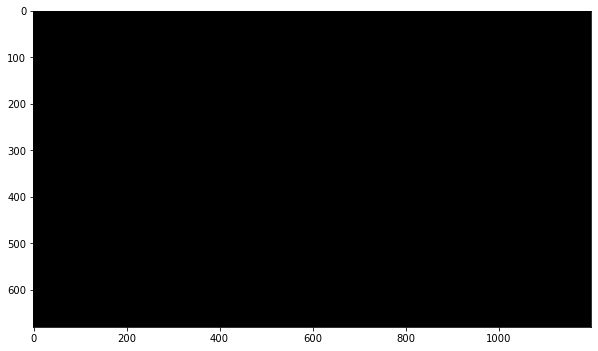

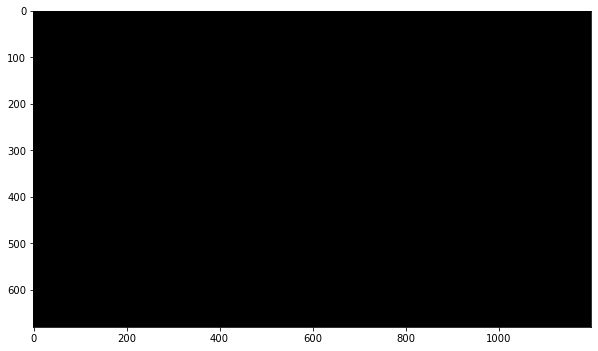

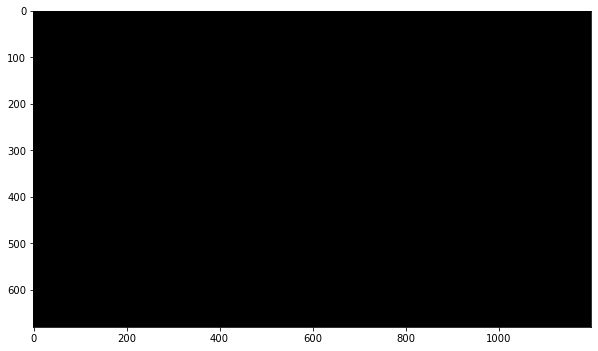

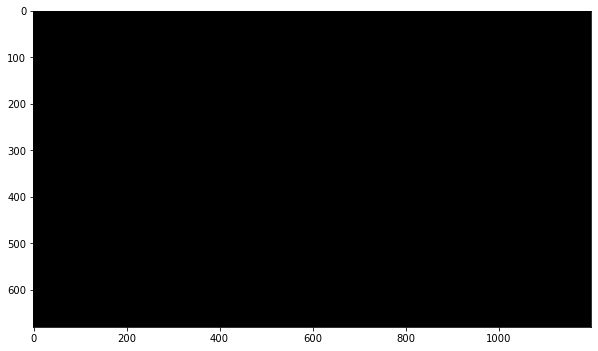

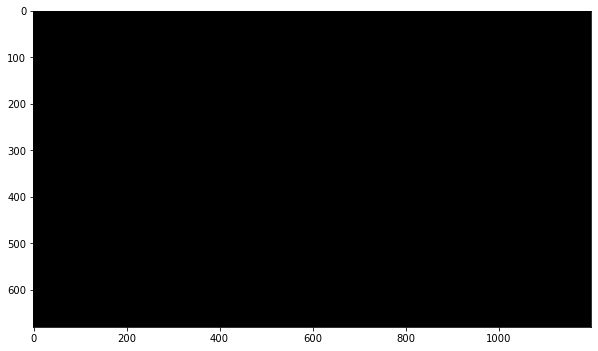

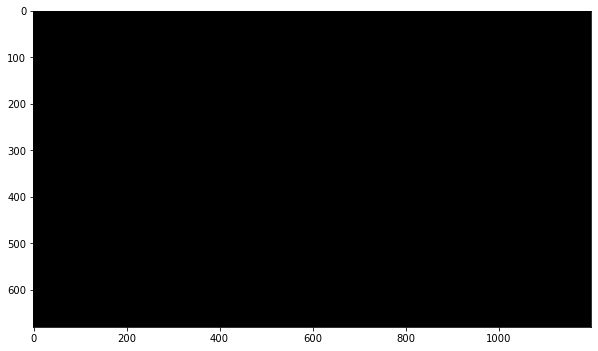

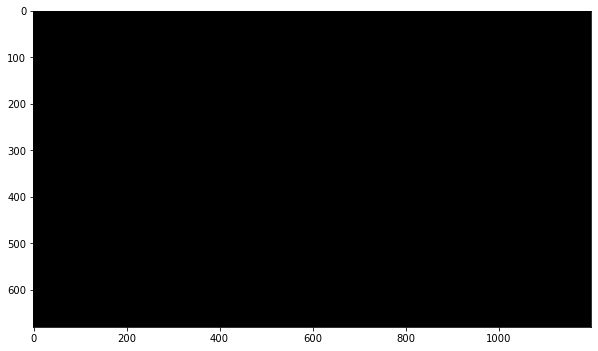

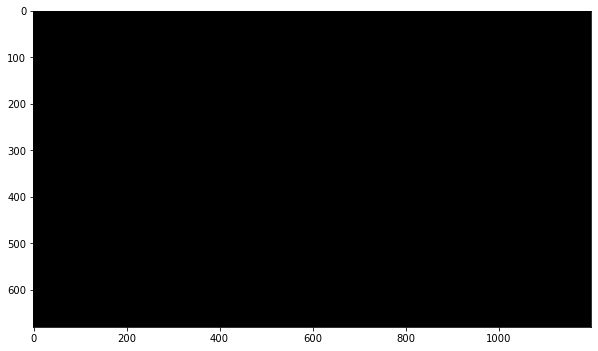

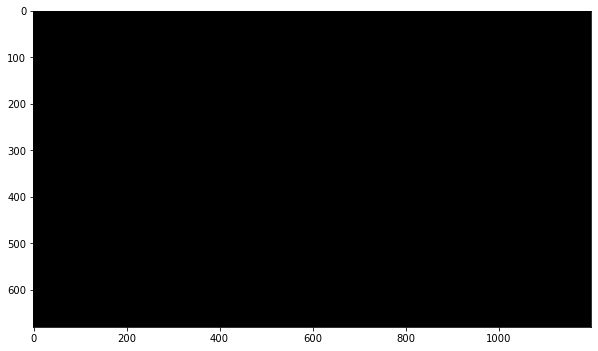

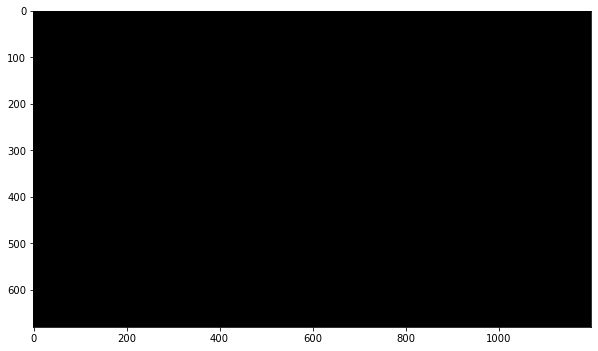

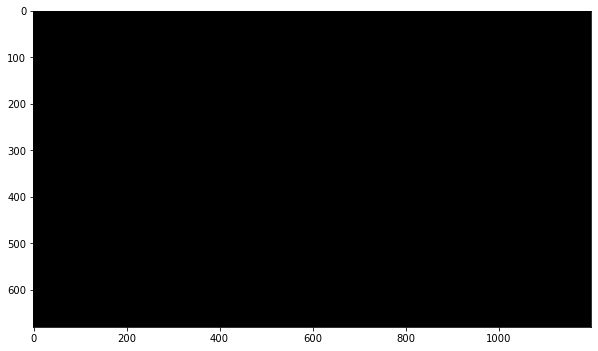

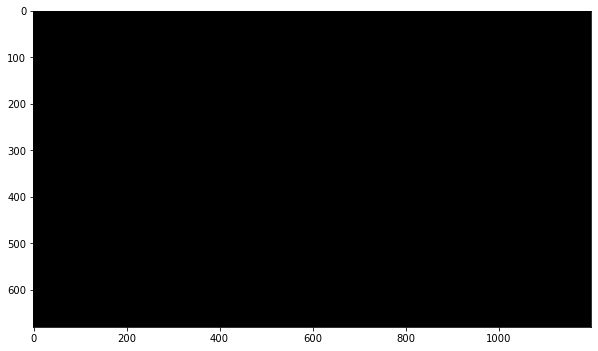

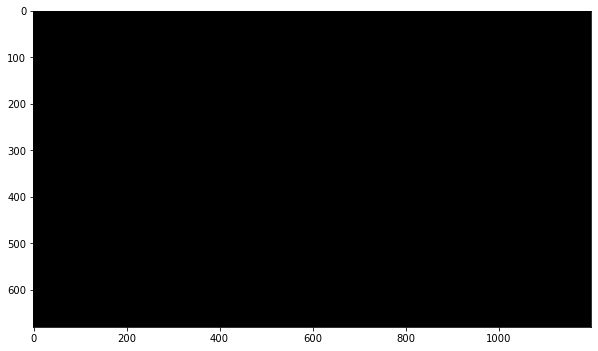

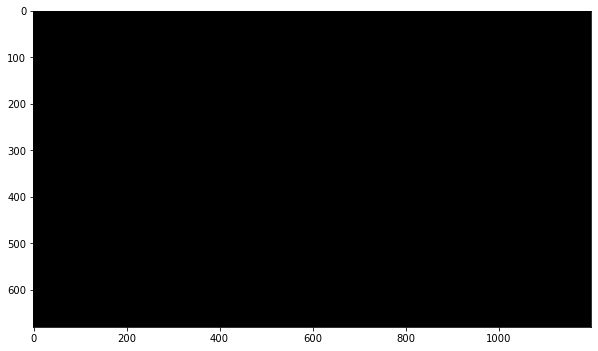

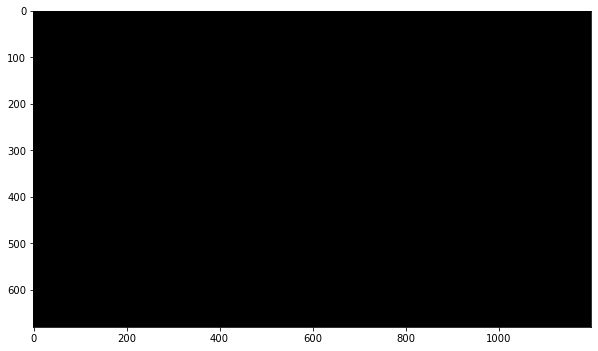

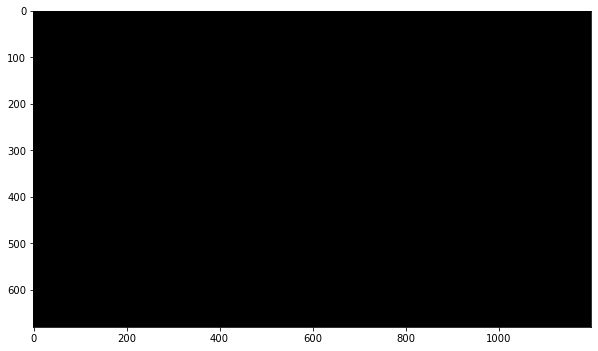

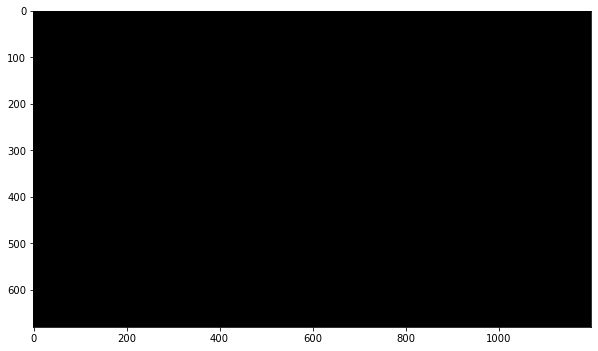

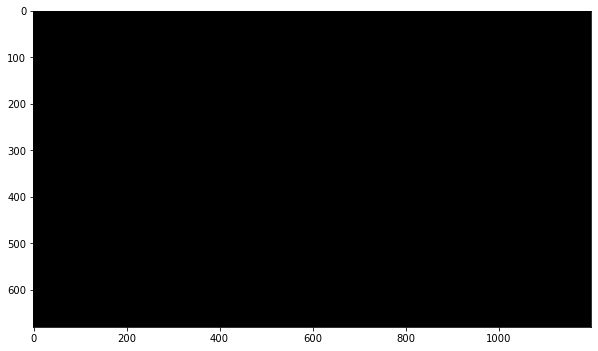

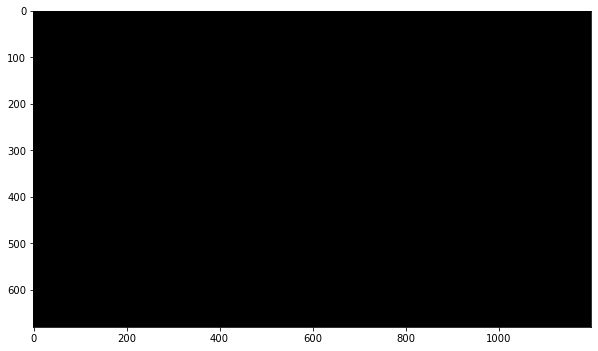

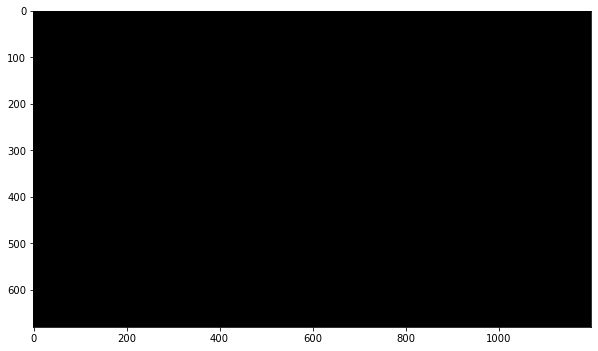

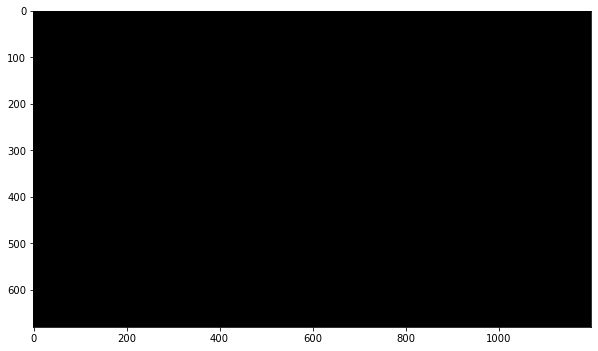

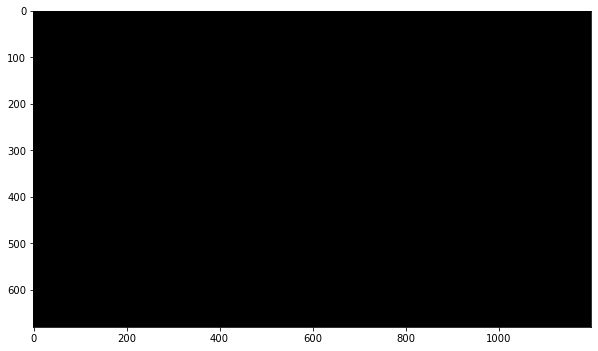

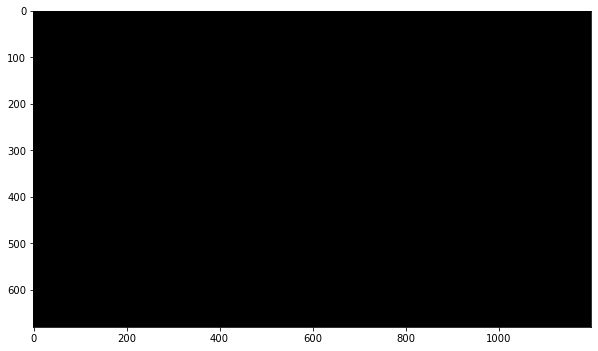

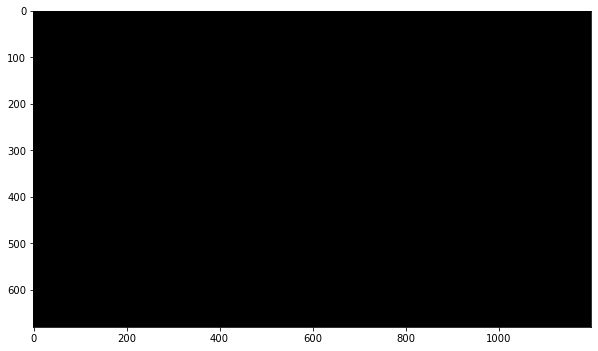

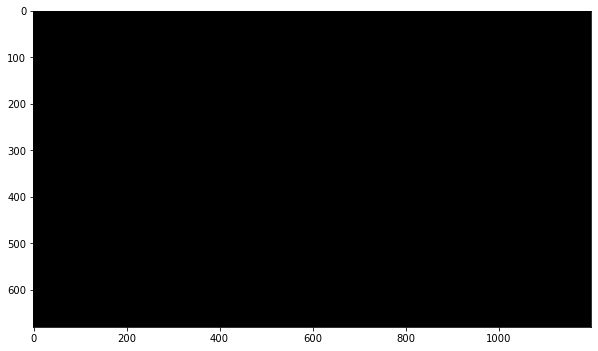

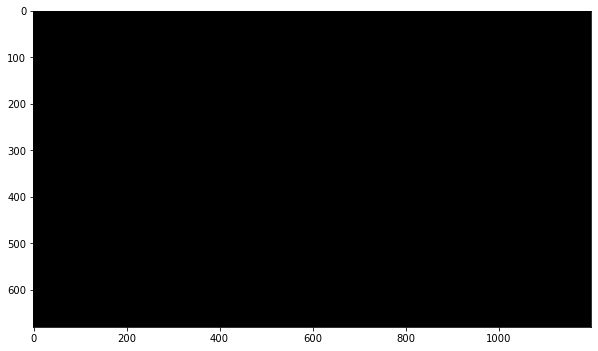

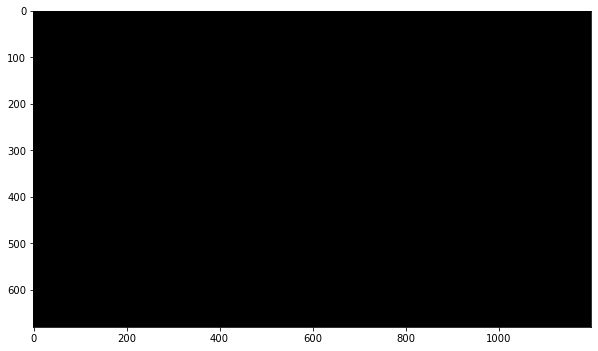

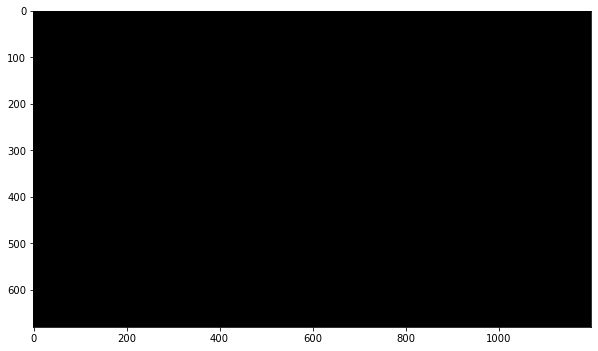

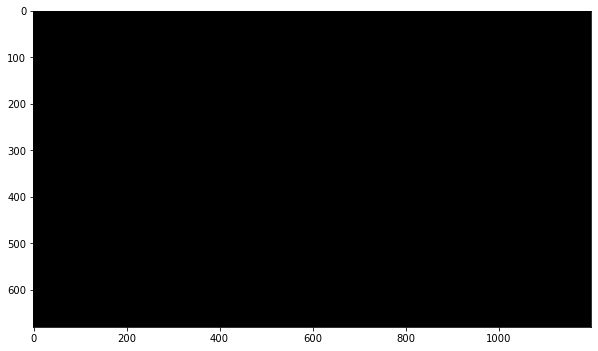

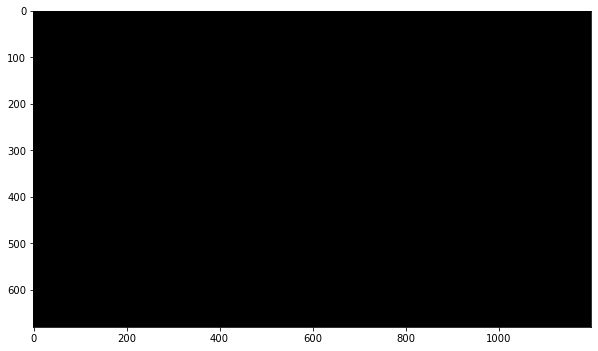

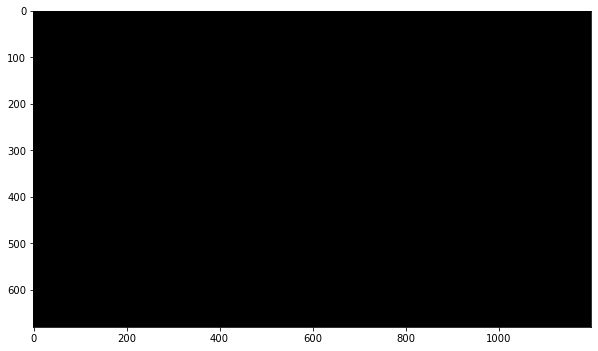

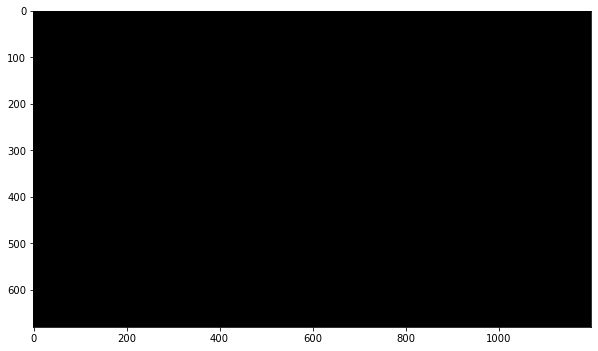

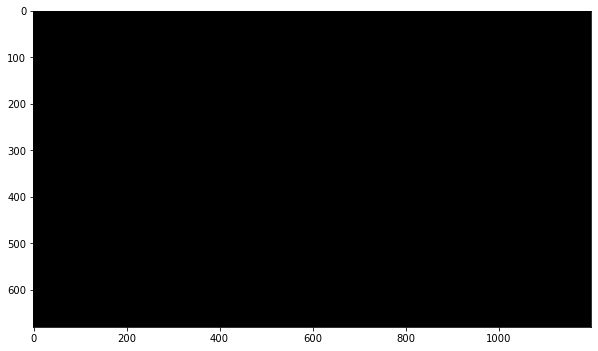

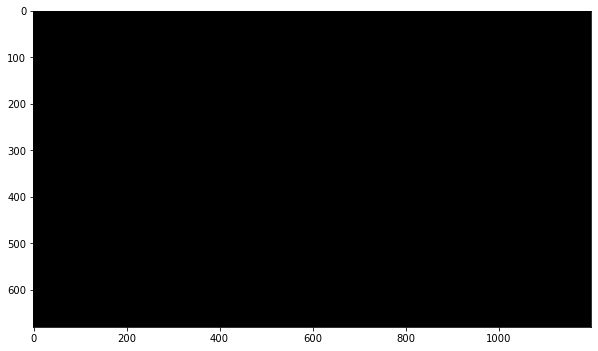

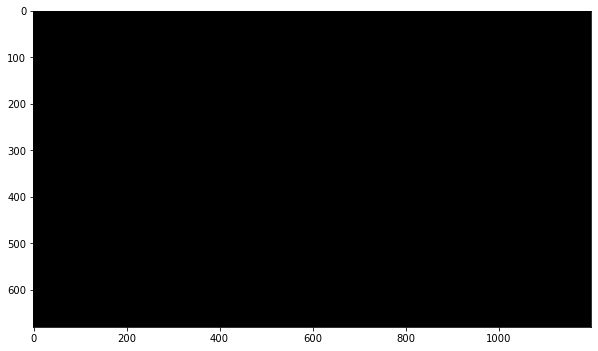

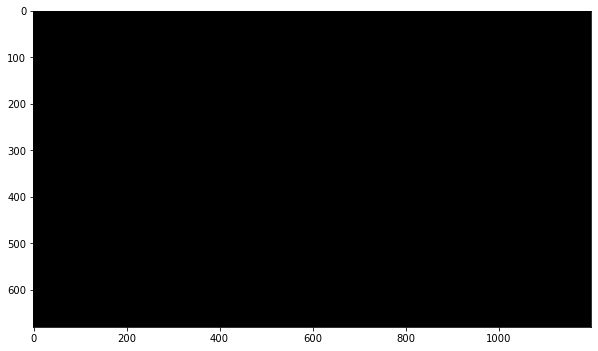

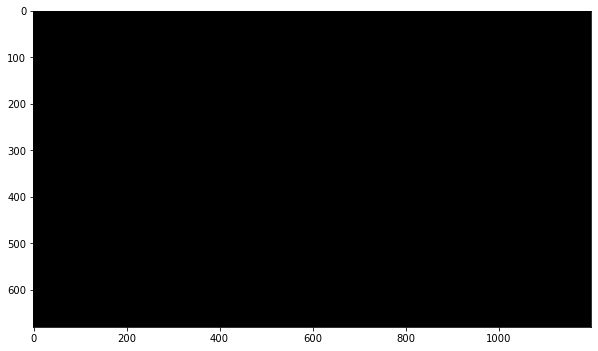

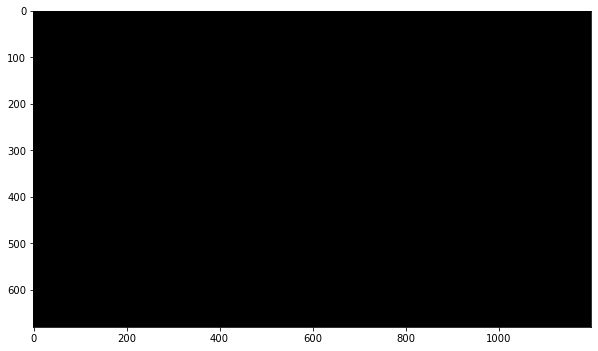

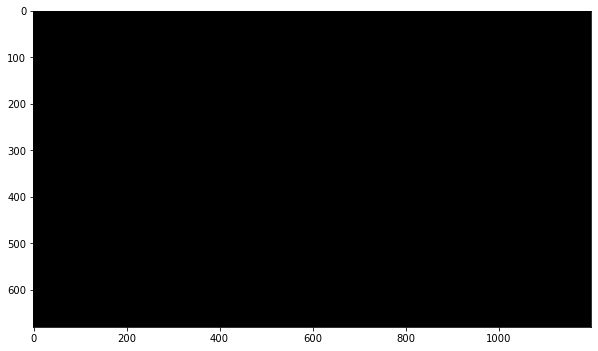

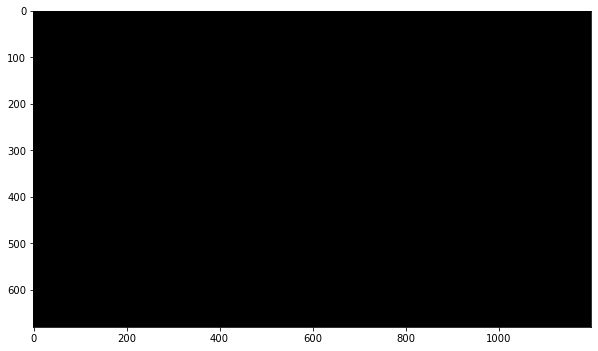

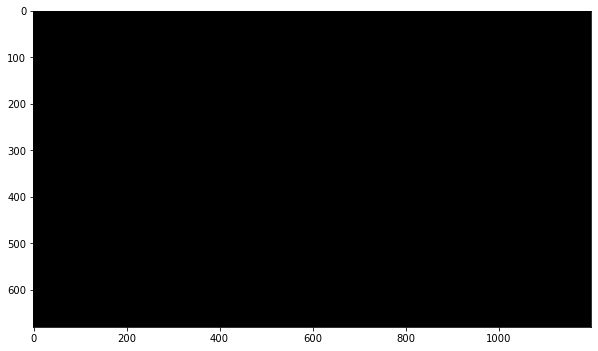

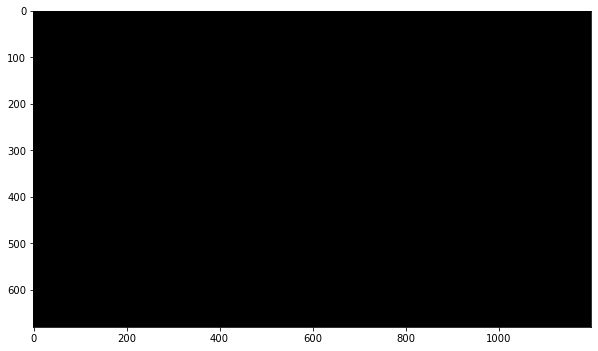

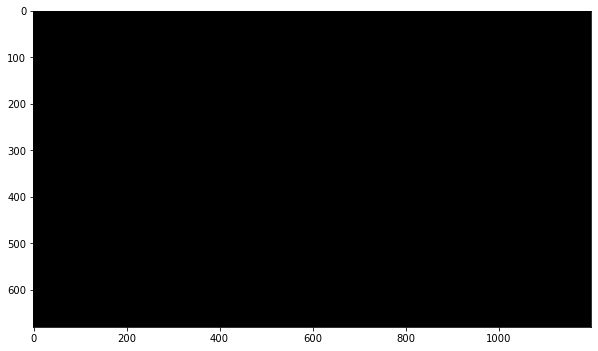

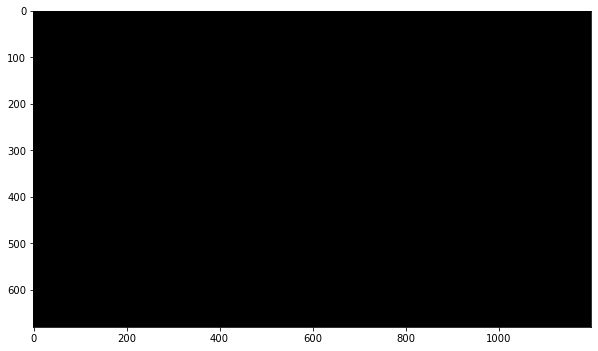

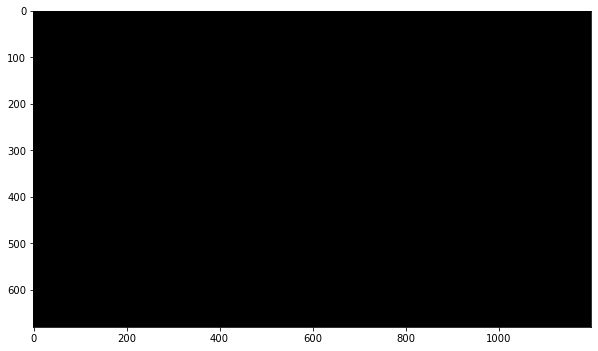

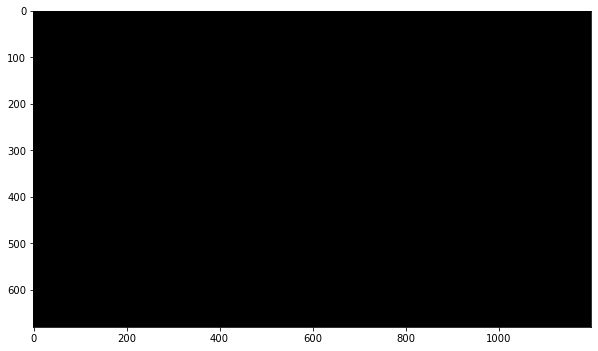

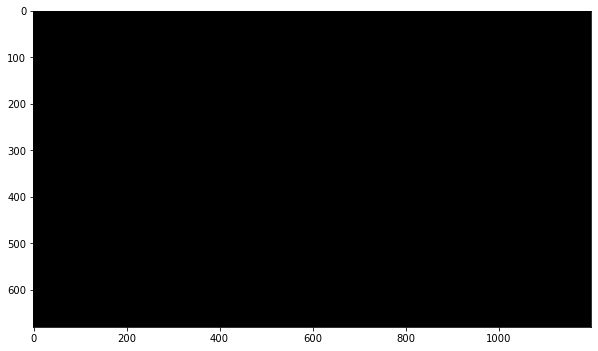

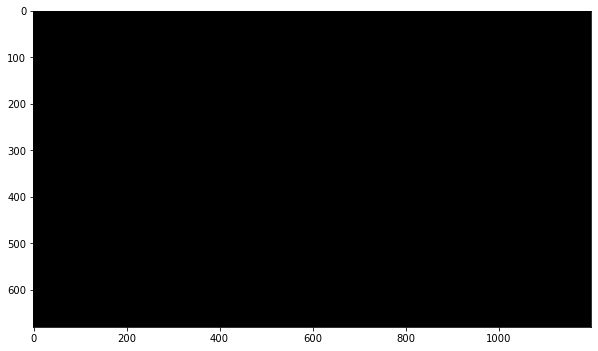

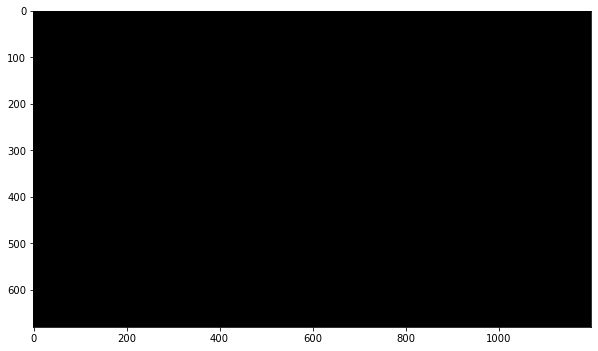

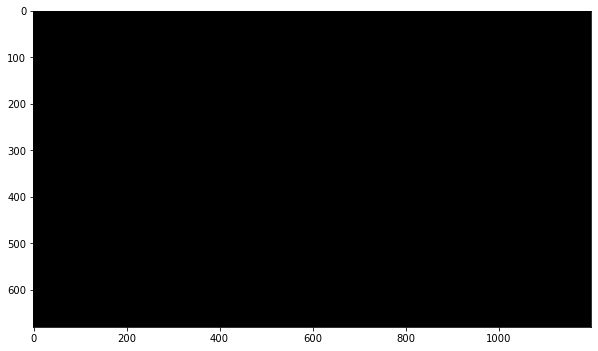

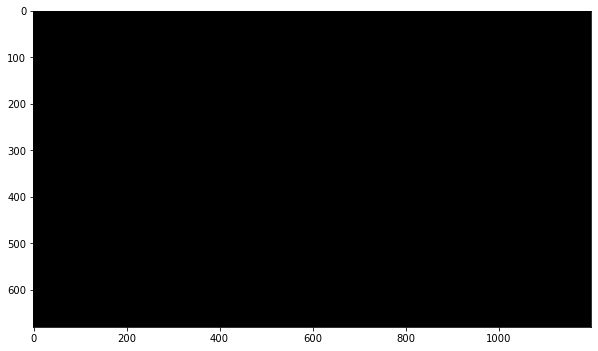

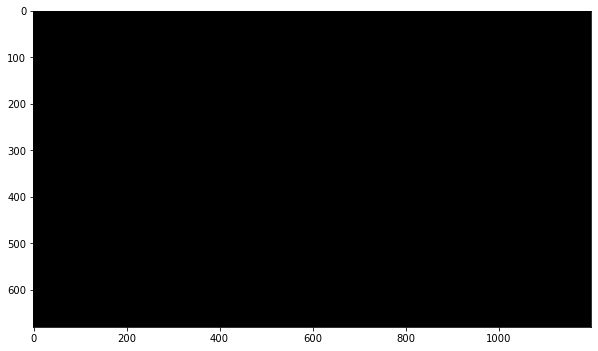

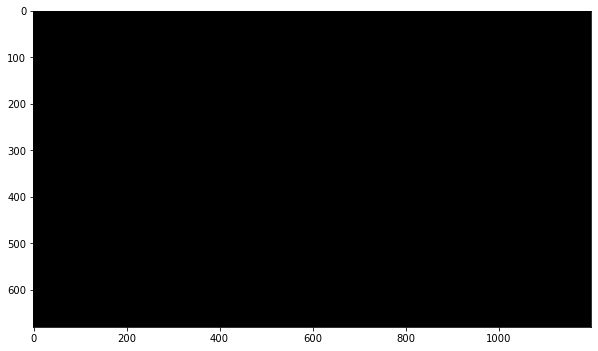

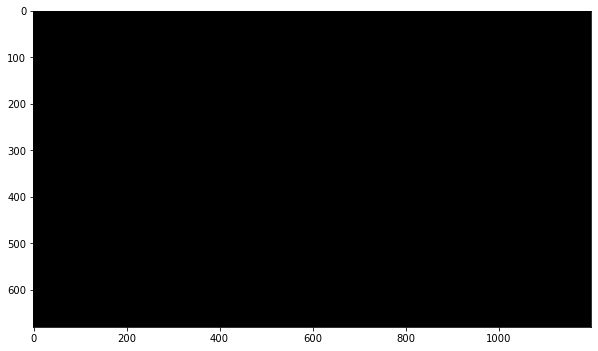

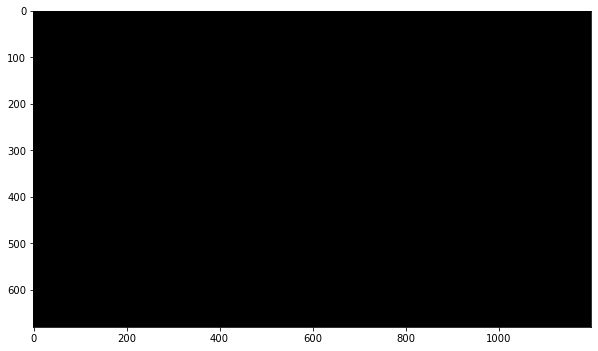

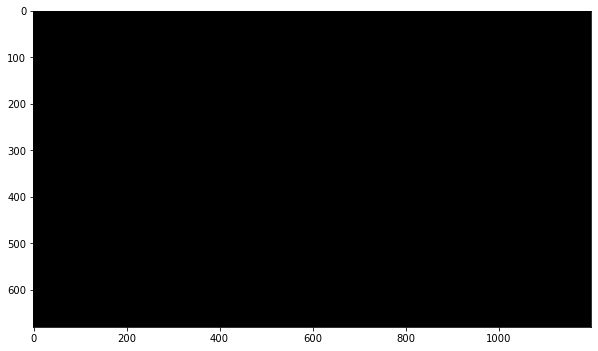

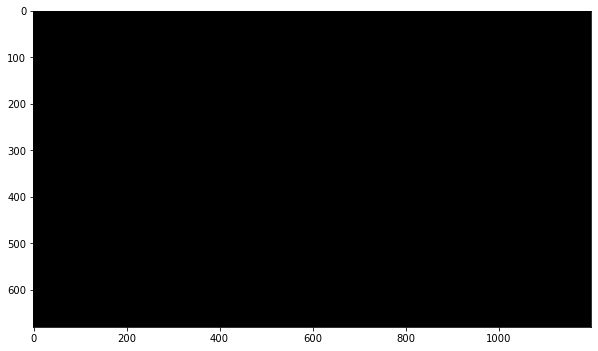

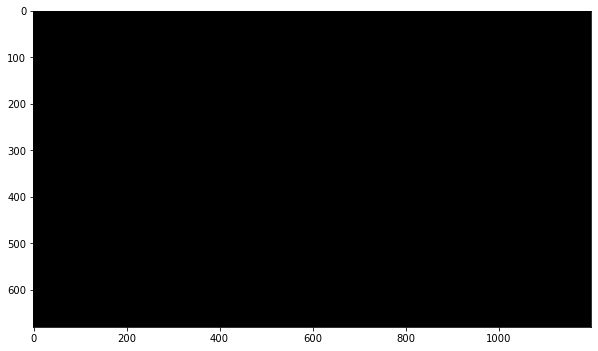

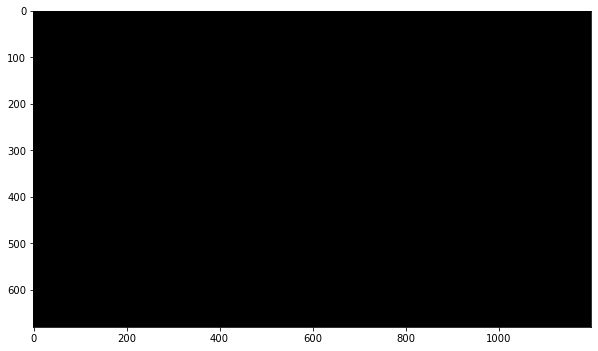

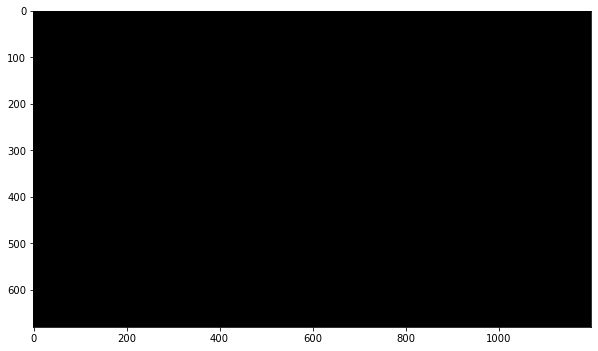

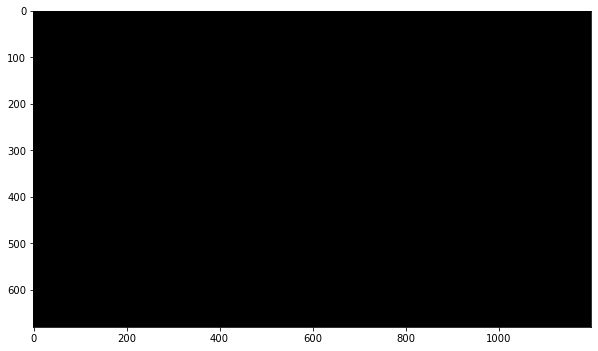

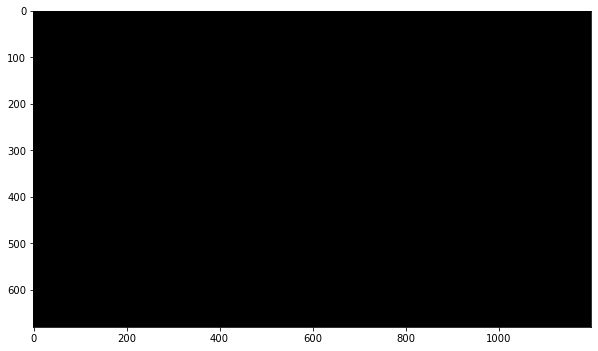

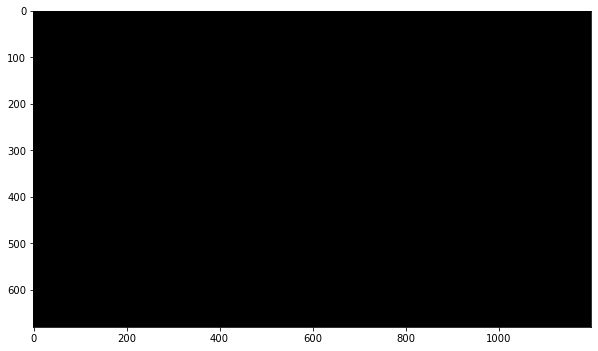

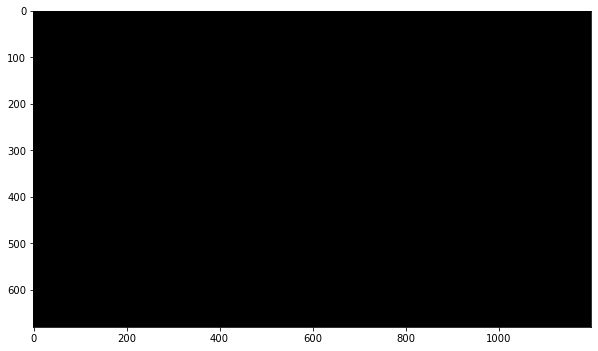

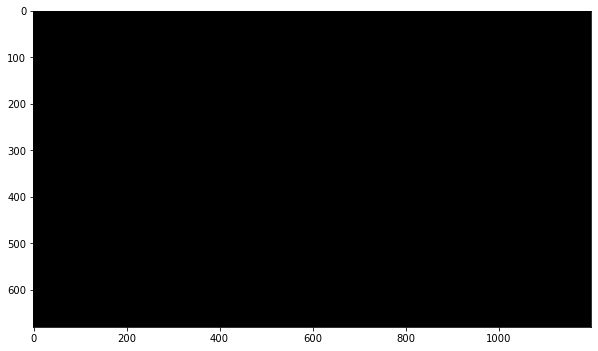

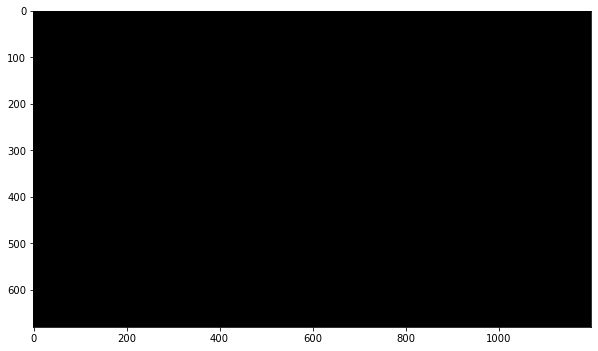

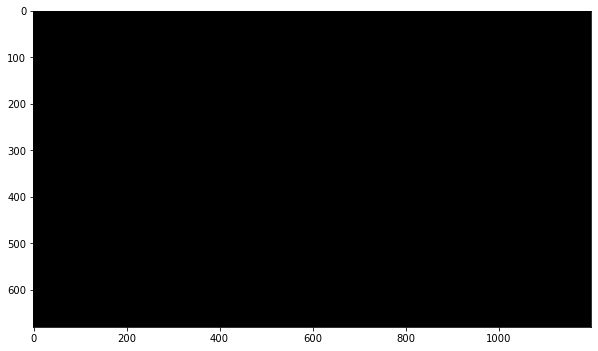

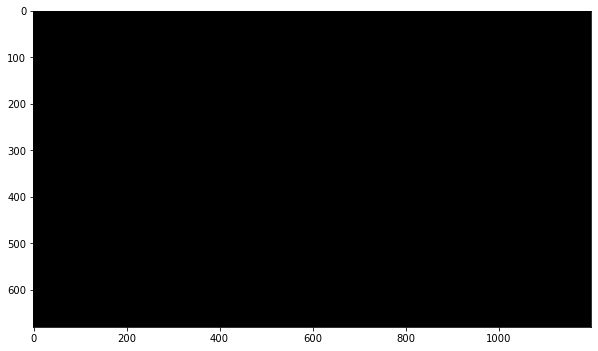

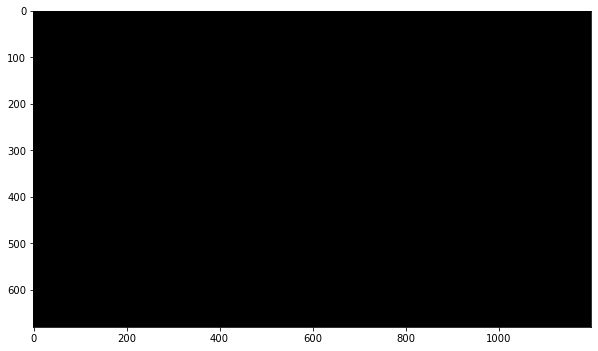

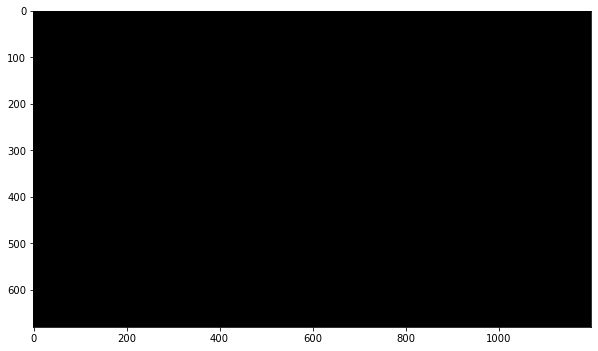

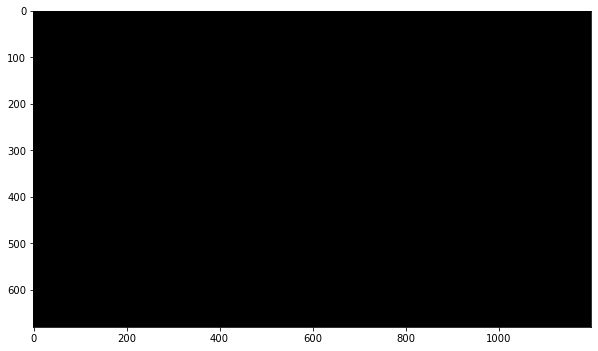

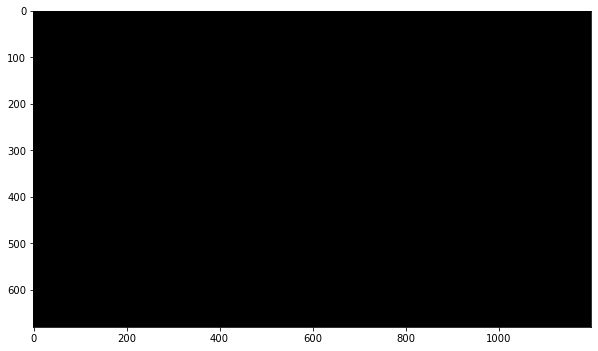

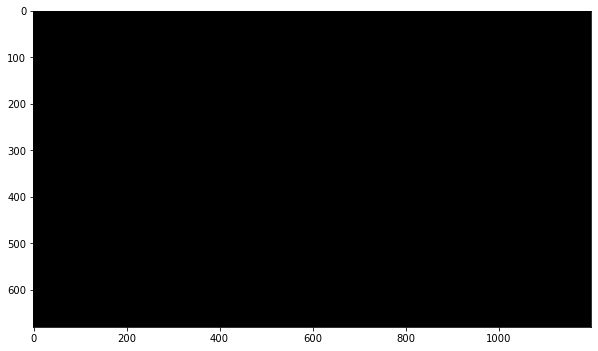

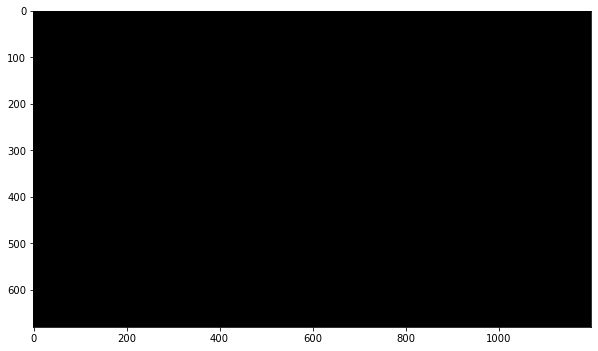

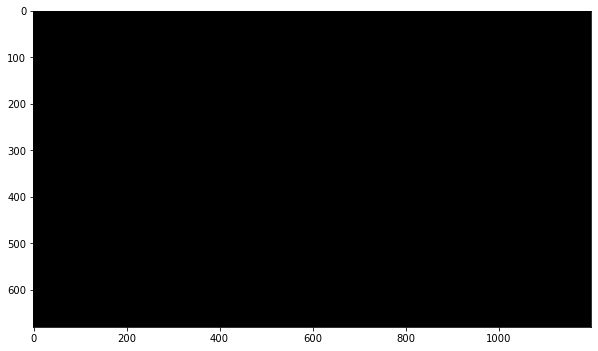

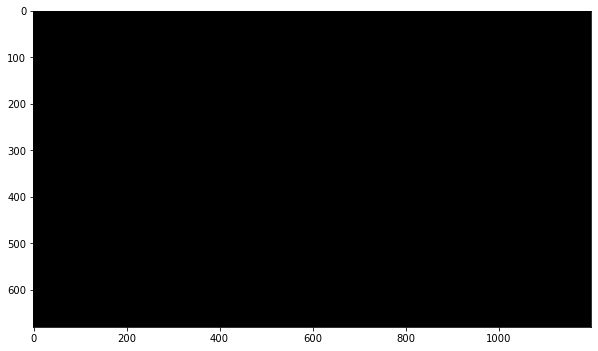

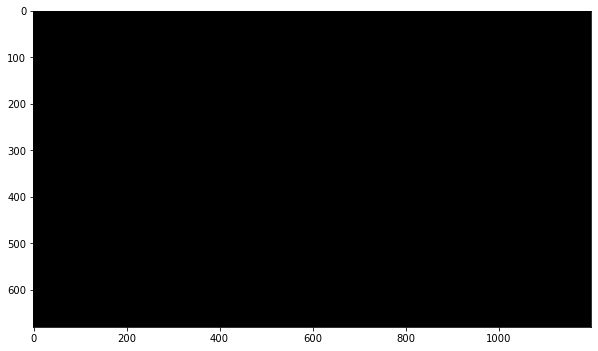

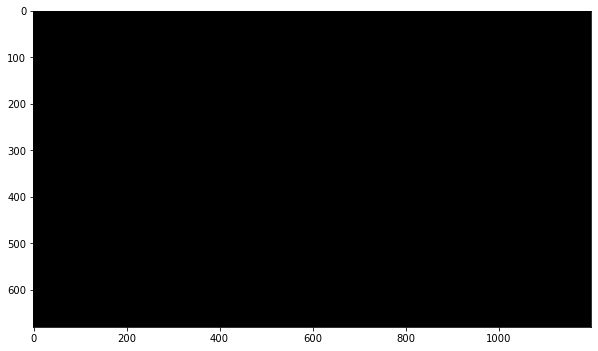

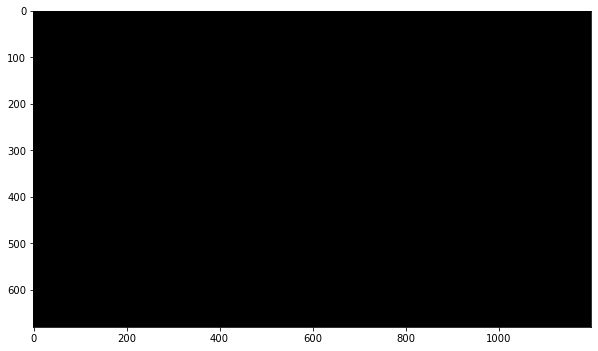

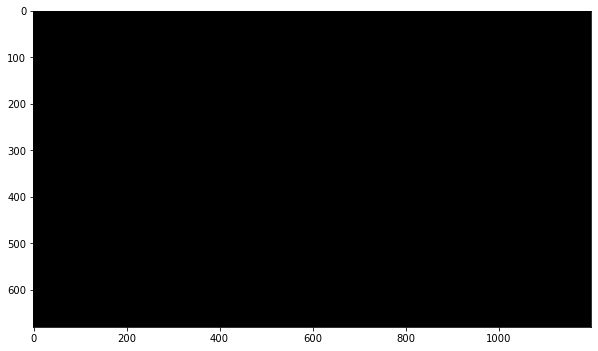

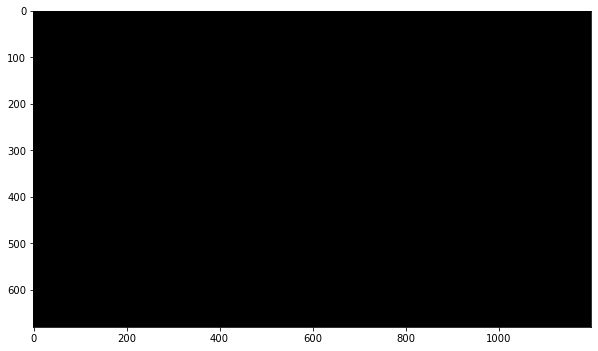

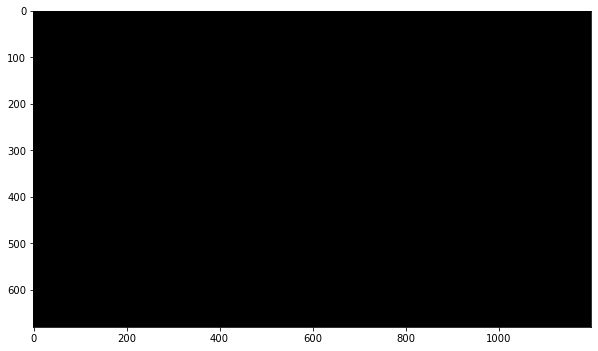

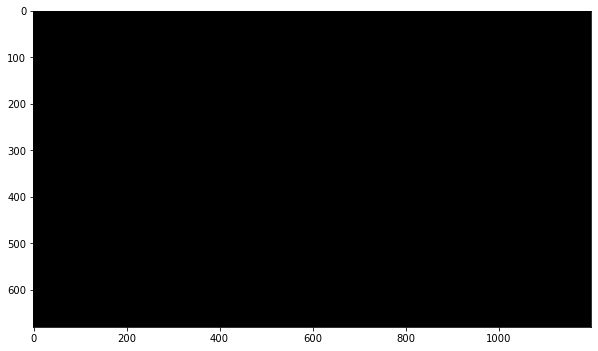

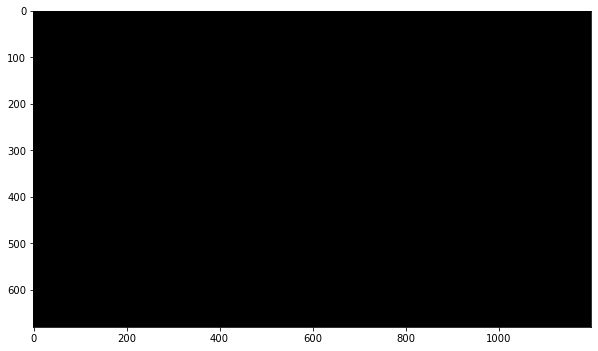

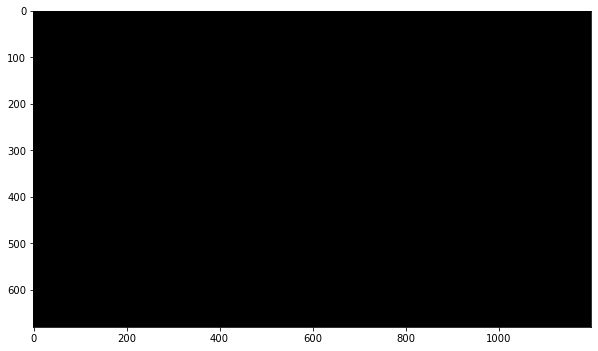

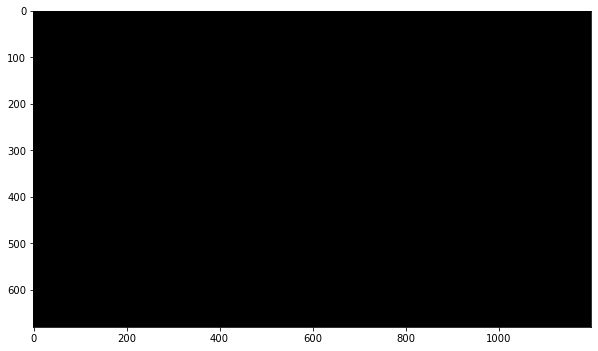

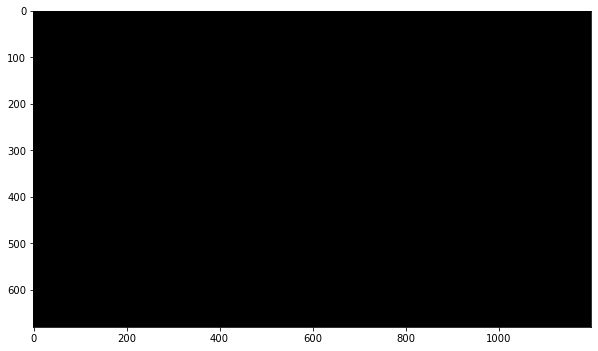

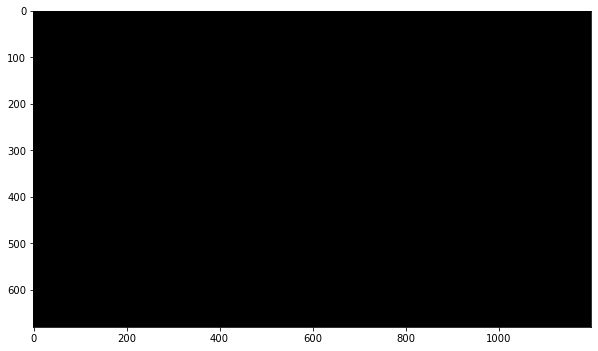

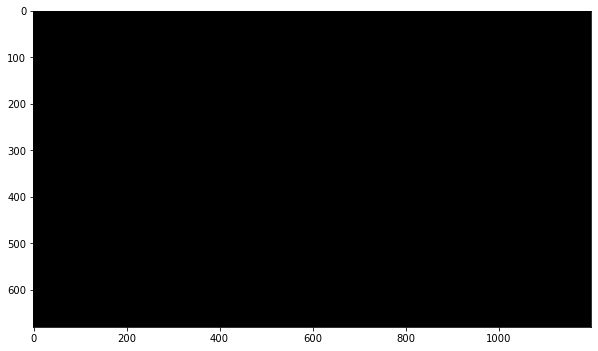

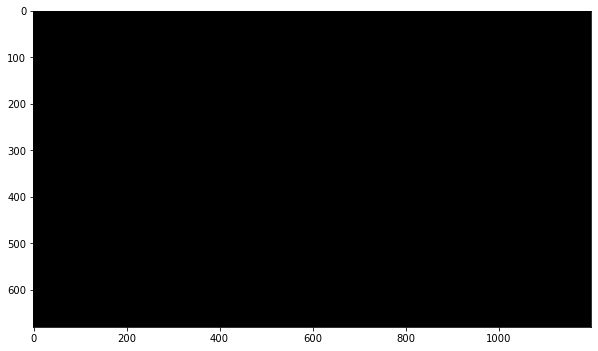

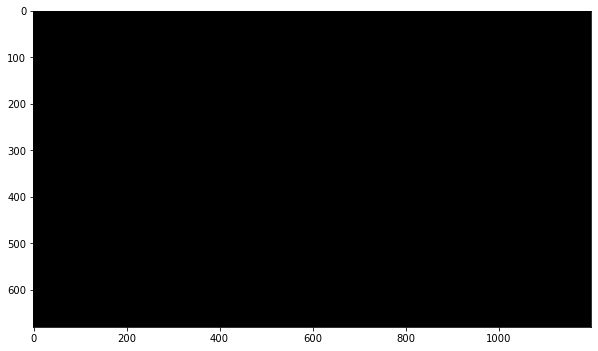

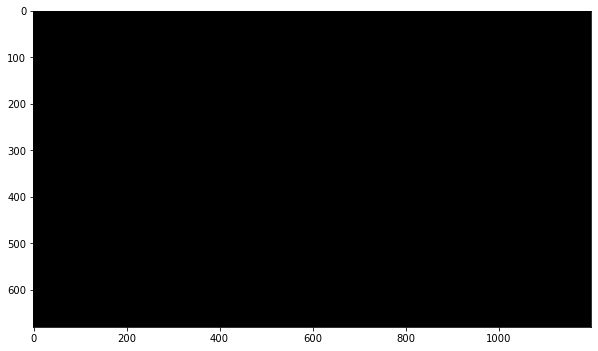

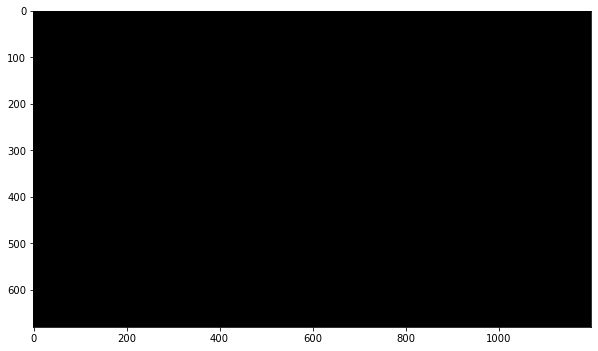

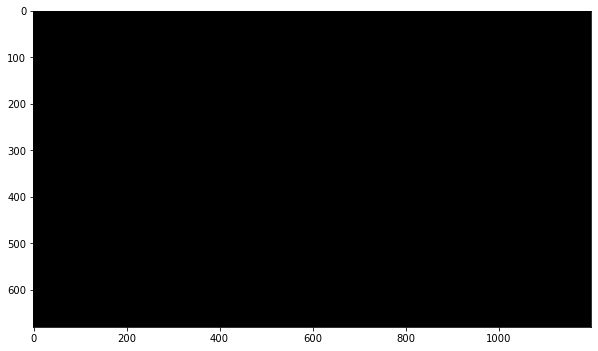

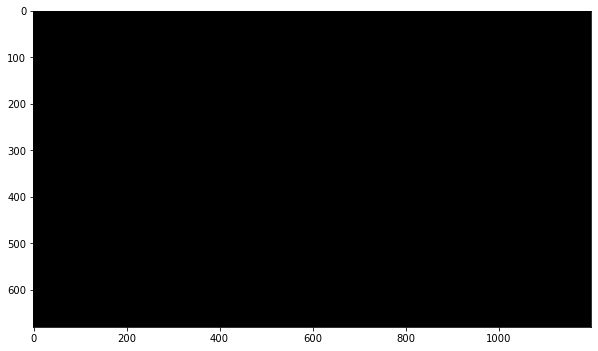

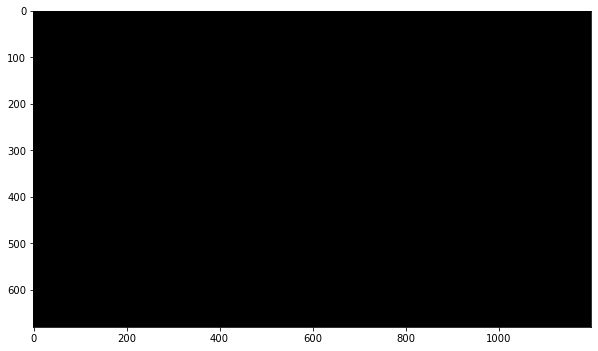

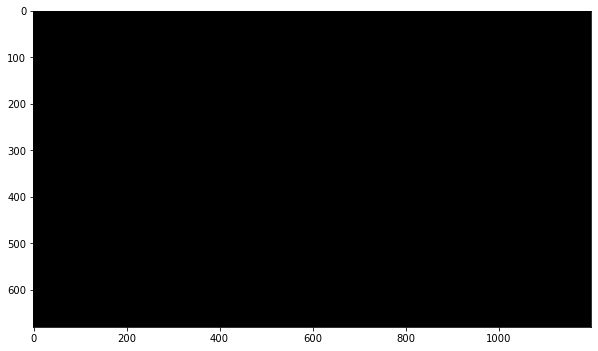

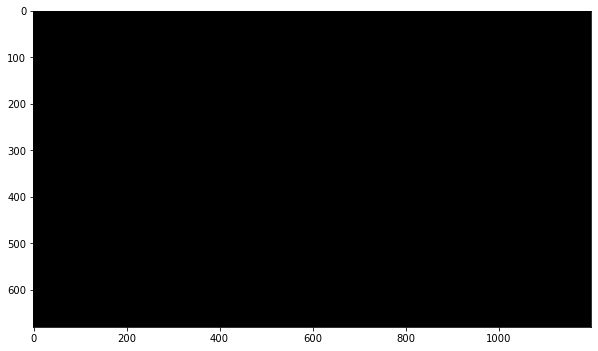

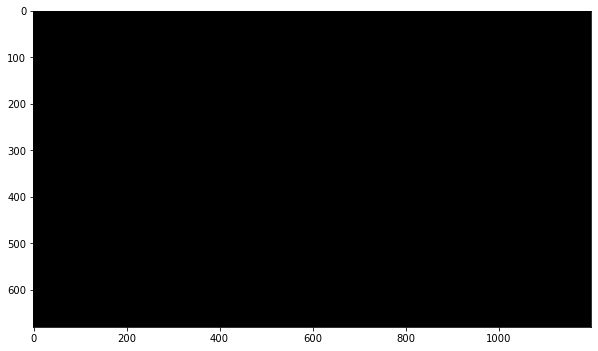

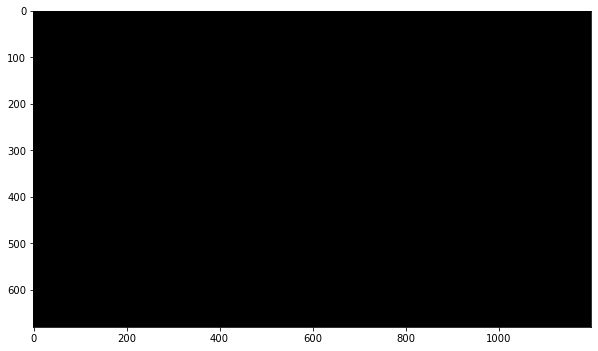

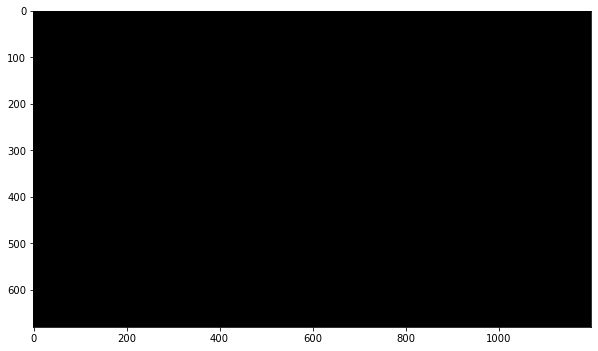

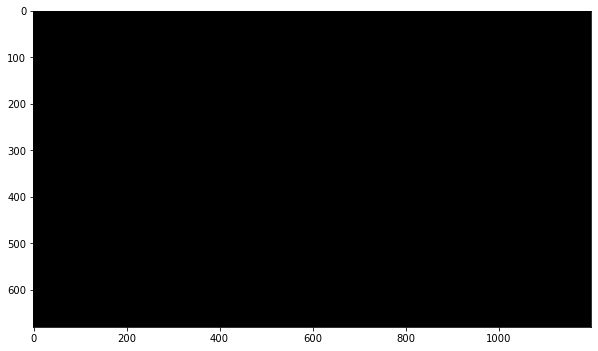

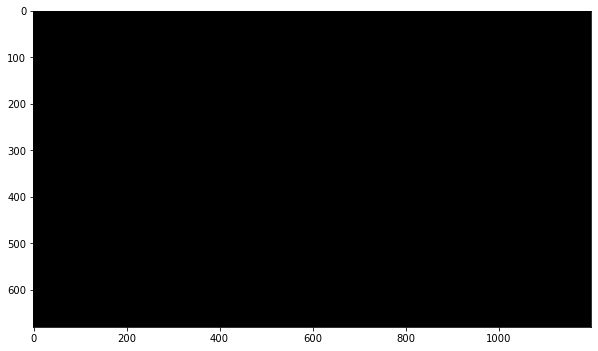

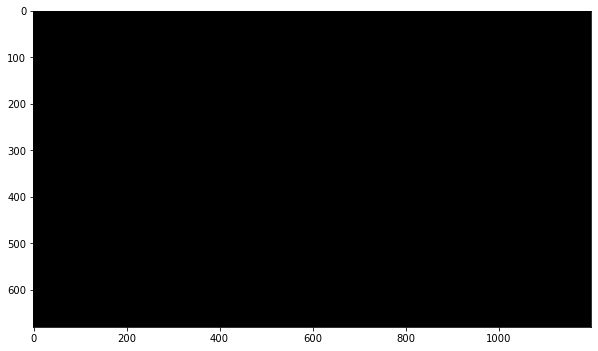

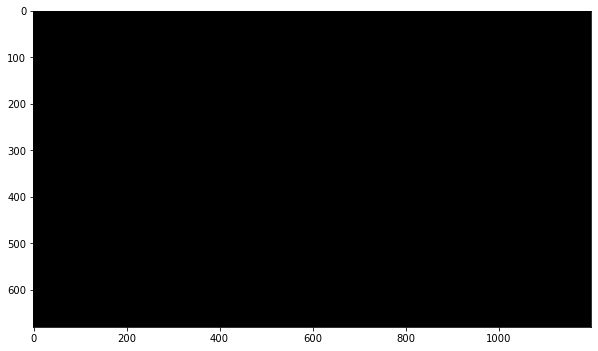

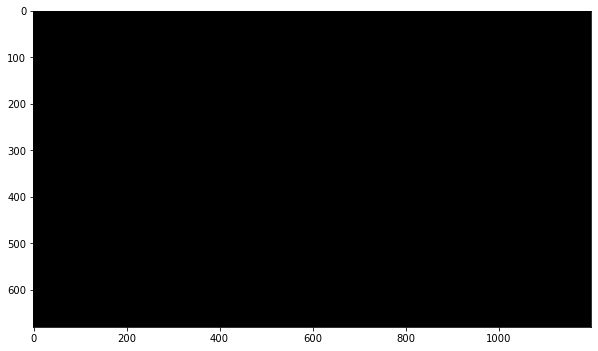

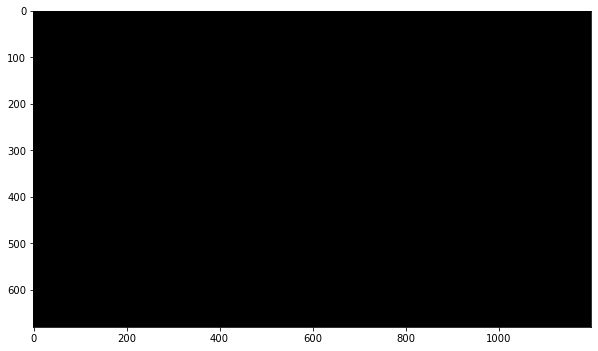

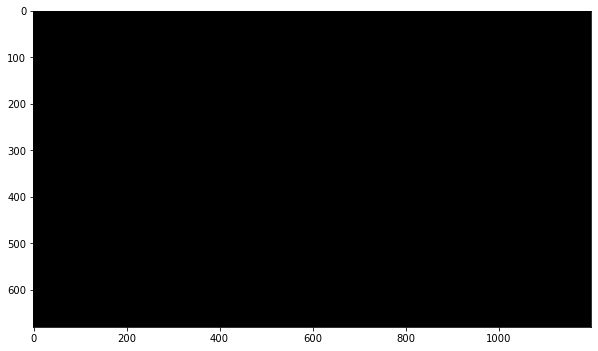

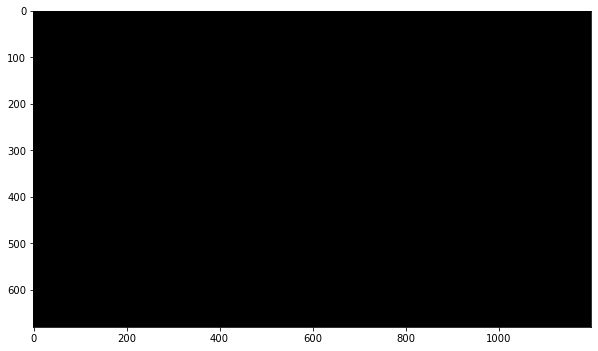

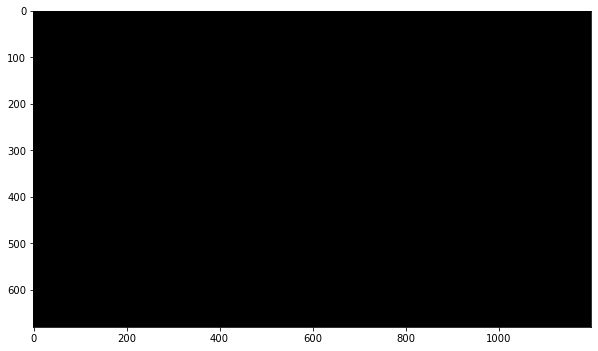

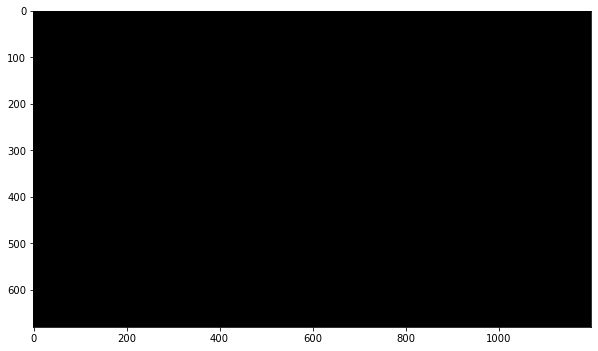

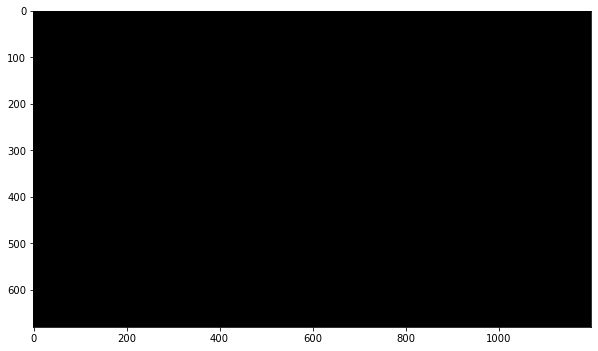

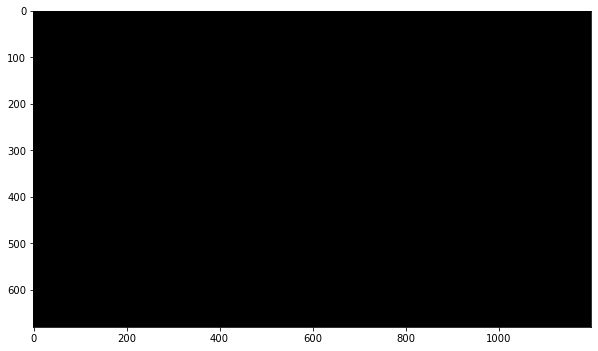

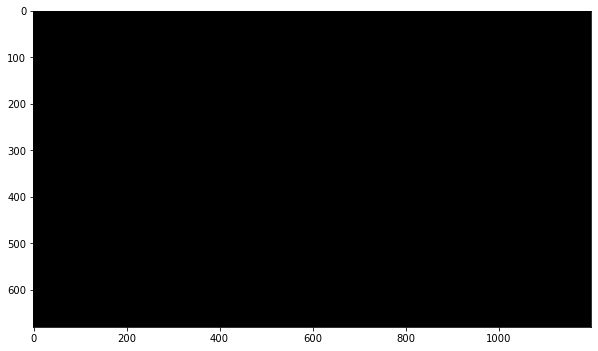

Storing segmentations: 100%|██████████| 40/40 [00:00<00:00, 138.91it/s]


In [2]:
frames = segmenter.run()


In [3]:
frame = frames[0]
frame

tensor([[  23,   23,   23,  ...,   13,   13,   13],
        [  23,   23,   23,  ...,   13,   13,   13],
        [  23,   23,   23,  ...,   13,   13,   13],
        ...,
        [  22,   22,   22,  ...,   22,   22,   22],
        [-100, -100, -100,  ...,   22,   22,   22],
        [-100, -100, -100,  ..., -100, -100, -100]], dtype=torch.int32)

In [4]:
from scripts import gifMaker

In [5]:
gifMaker.make_gif_from_array(frames, store = 'test.gif')

TypeError: Cannot handle this data type: (1, 1, 4), <f8